IMPORTATION DES PACKAGES 

In [272]:
import pandas as pd
import numpy as np 
import missingno as msno #pip install missingno
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import itertools



In [273]:
#lecture du fichier csv contenant le jeu de données

df = pd.read_csv("final_depression_dataset_1.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

Name  Gender  Age       City Working Professional or Student  \
0    Pooja  Female   37  Ghaziabad            Working Professional   
1  Reyansh    Male   60     Kalyan            Working Professional   
2    Manvi  Female   42     Bhopal            Working Professional   
3     Isha  Female   44      Thane            Working Professional   
4    Aarav    Male   48     Indore            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
0            Teacher                NaN            2.0   NaN   
1  Financial Analyst                NaN            4.0   NaN   
2            Teacher                NaN            2.0   NaN   
3            Teacher                NaN            3.0   NaN   
4     UX/UI Designer                NaN            4.0   NaN   

   Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits Degree  \
0                 NaN               4.0      7-8 hours       Moderate     MA   
1                 NaN               3.0      5-6 hours      Unhealthy  B.Com   
2                 NaN               3.0      5-6 hours       Moderate  M.Com   
3                 NaN               5.0      7-8 hours        Healthy     MD   
4                 NaN               3.0      7-8 hours       Moderate     BE   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No                 6                 2   
1                                   Yes                 0                 4   
2                                    No                 0                 2   
3                                   Yes                 1                 2   
4                                   Yes                 6                 5   

  Family History of Mental Illness Depression  
0                               No         No  
1                              Yes         No  
2                               No         No  
3                              Yes         No  
4                              Yes         No

In [274]:
df['Work/Study Hours'].unique()
print(df['Work/Study Hours'].unique())

[ 6  0  1 12  3 11 10  8  7  9  5  2  4]


In [275]:

df.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [276]:
#Statistiques pour les variables quantitatives et qualitatives

df.describe(include='all')

Name Gender          Age      City Working Professional or Student  \
count     2556   2556  2556.000000      2556                            2556   
unique     216      2          NaN        30                               2   
top     Tushar   Male          NaN  Srinagar            Working Professional   
freq        26   1333          NaN       102                            2054   
mean       NaN    NaN    39.043036       NaN                             NaN   
std        NaN    NaN    12.260596       NaN                             NaN   
min        NaN    NaN    18.000000       NaN                             NaN   
25%        NaN    NaN    28.000000       NaN                             NaN   
50%        NaN    NaN    39.000000       NaN                             NaN   
75%        NaN    NaN    50.000000       NaN                             NaN   
max        NaN    NaN    60.000000       NaN                             NaN   

       Profession  Academic Pressure  Work Pressure        CGPA  \
count        1883         502.000000    2054.000000  502.000000   
unique         35                NaN            NaN         NaN   
top       Teacher                NaN            NaN         NaN   
freq          322                NaN            NaN         NaN   
mean          NaN           3.003984       3.021908    7.567809   
std           NaN           1.390007       1.417312    1.465367   
min           NaN           1.000000       1.000000    5.030000   
25%           NaN           2.000000       2.000000    6.210000   
50%           NaN           3.000000       3.000000    7.605000   
75%           NaN           4.000000       4.000000    8.825000   
max           NaN           5.000000       5.000000   10.000000   

        Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits  \
count           502.000000       2054.000000           2556           2556   
unique                 NaN               NaN              4              3   
top                    NaN               NaN      7-8 hours      Unhealthy   
freq                   NaN               NaN            658            882   
mean              3.075697          3.015093            NaN            NaN   
std               1.373490          1.418432            NaN            NaN   
min               1.000000          1.000000            NaN            NaN   
25%               2.000000          2.000000            NaN            NaN   
50%               3.000000          3.000000            NaN            NaN   
75%               4.000000          4.000000            NaN            NaN   
max               5.000000          5.000000            NaN            NaN   

          Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
count       2556                                  2556       2556.000000   
unique        27                                     2               NaN   
top     Class 12                                    No               NaN   
freq         275                                  1307               NaN   
mean         NaN                                   NaN          6.023865   
std          NaN                                   NaN          3.771743   
min          NaN                                   NaN          0.000000   
25%          NaN                                   NaN          3.000000   
50%          NaN                                   NaN          6.000000   
75%          NaN                                   NaN          9.000000   
max          NaN                                   NaN         12.000000   

        Financial Stress Family History of Mental Illness Depression  
count        2556.000000                             2556       2556  
unique               NaN                                2          2  
top                  NaN                               No         No  
freq                 NaN                             1311       2101  
mean            2.968701               

NETTOYAGE DE LA BASE DE DONNEES & TRAITEMENT DES DONNEES MANQUANTES 
VERIFIER LES DOUBLONS 


# Charger un dataset avec des valeurs manquantes
df = pd.read_csv("mon_fichier.csv")

# Afficher la matrice des valeurs manquantes
msno.matrix(df)
msno.bar(df) pour voir le pourcentage des valeurs manquantes
msno.heatmap(df) voir la correlation des valeurs manquantes. Si deux colonnes sont fortement corrélées, on peut essayer de prédire les valeurs manquantes d’une colonne en utilisant l’autre.

msno.dendrogram(df) : Utile pour voir quelles colonnes ont des structures similaires de valeurs manquantes.Ça peut aider à regrouper les variables et voir lesquelles sont redondantes.

 Pourquoi utiliser missingno ?
✔ Facile et rapide à utiliser
✔ Meilleure compréhension des données manquantes
✔ Permet d’adapter la meilleure stratégie d’imputation


In [277]:
duplicates = df[df.duplicated()]
print(f"Nombre de doublons trouvés : {duplicates.shape[0]}")
print(duplicates)

Nombre de doublons trouvés : 0
Empty DataFrame
Columns: [Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


<Axes: >

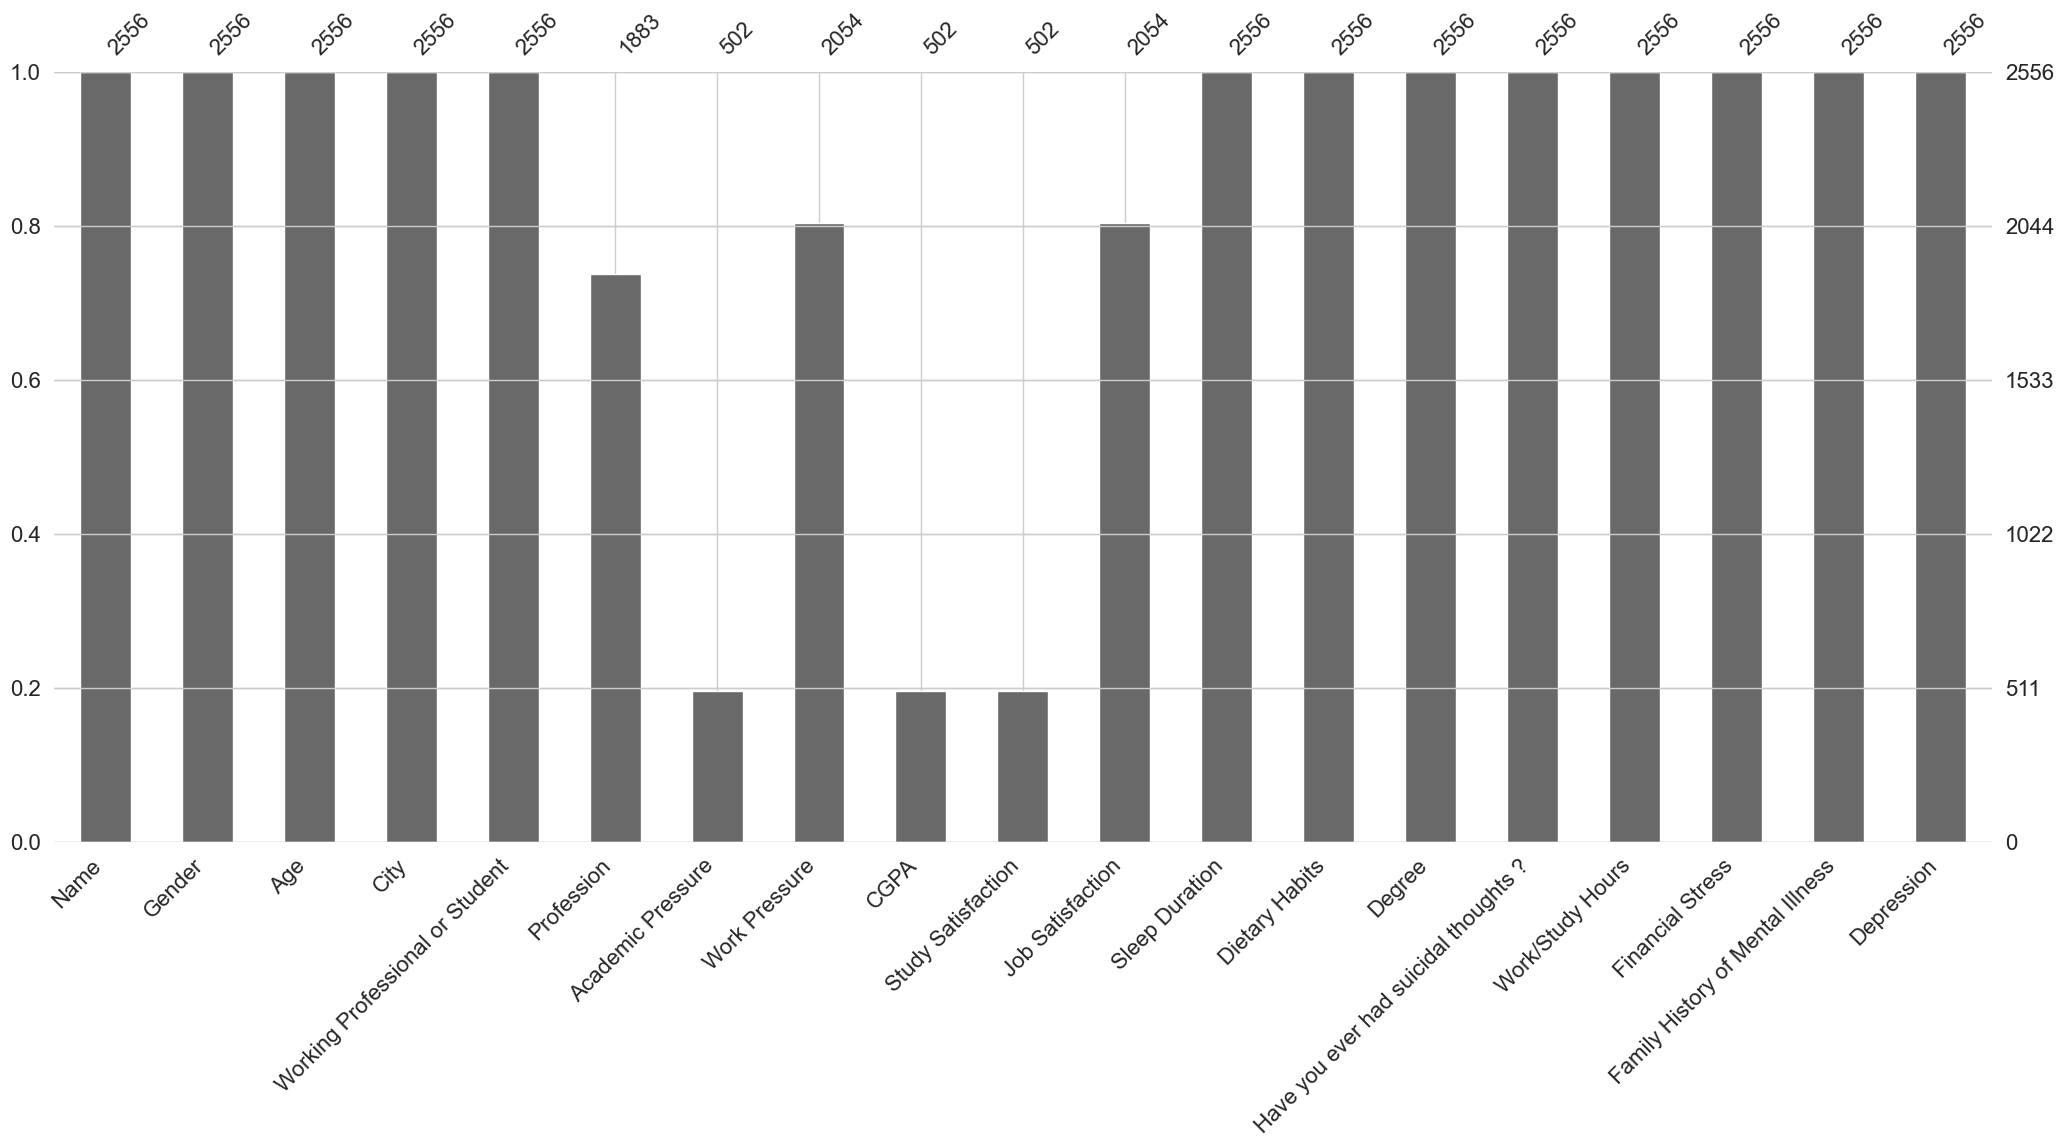

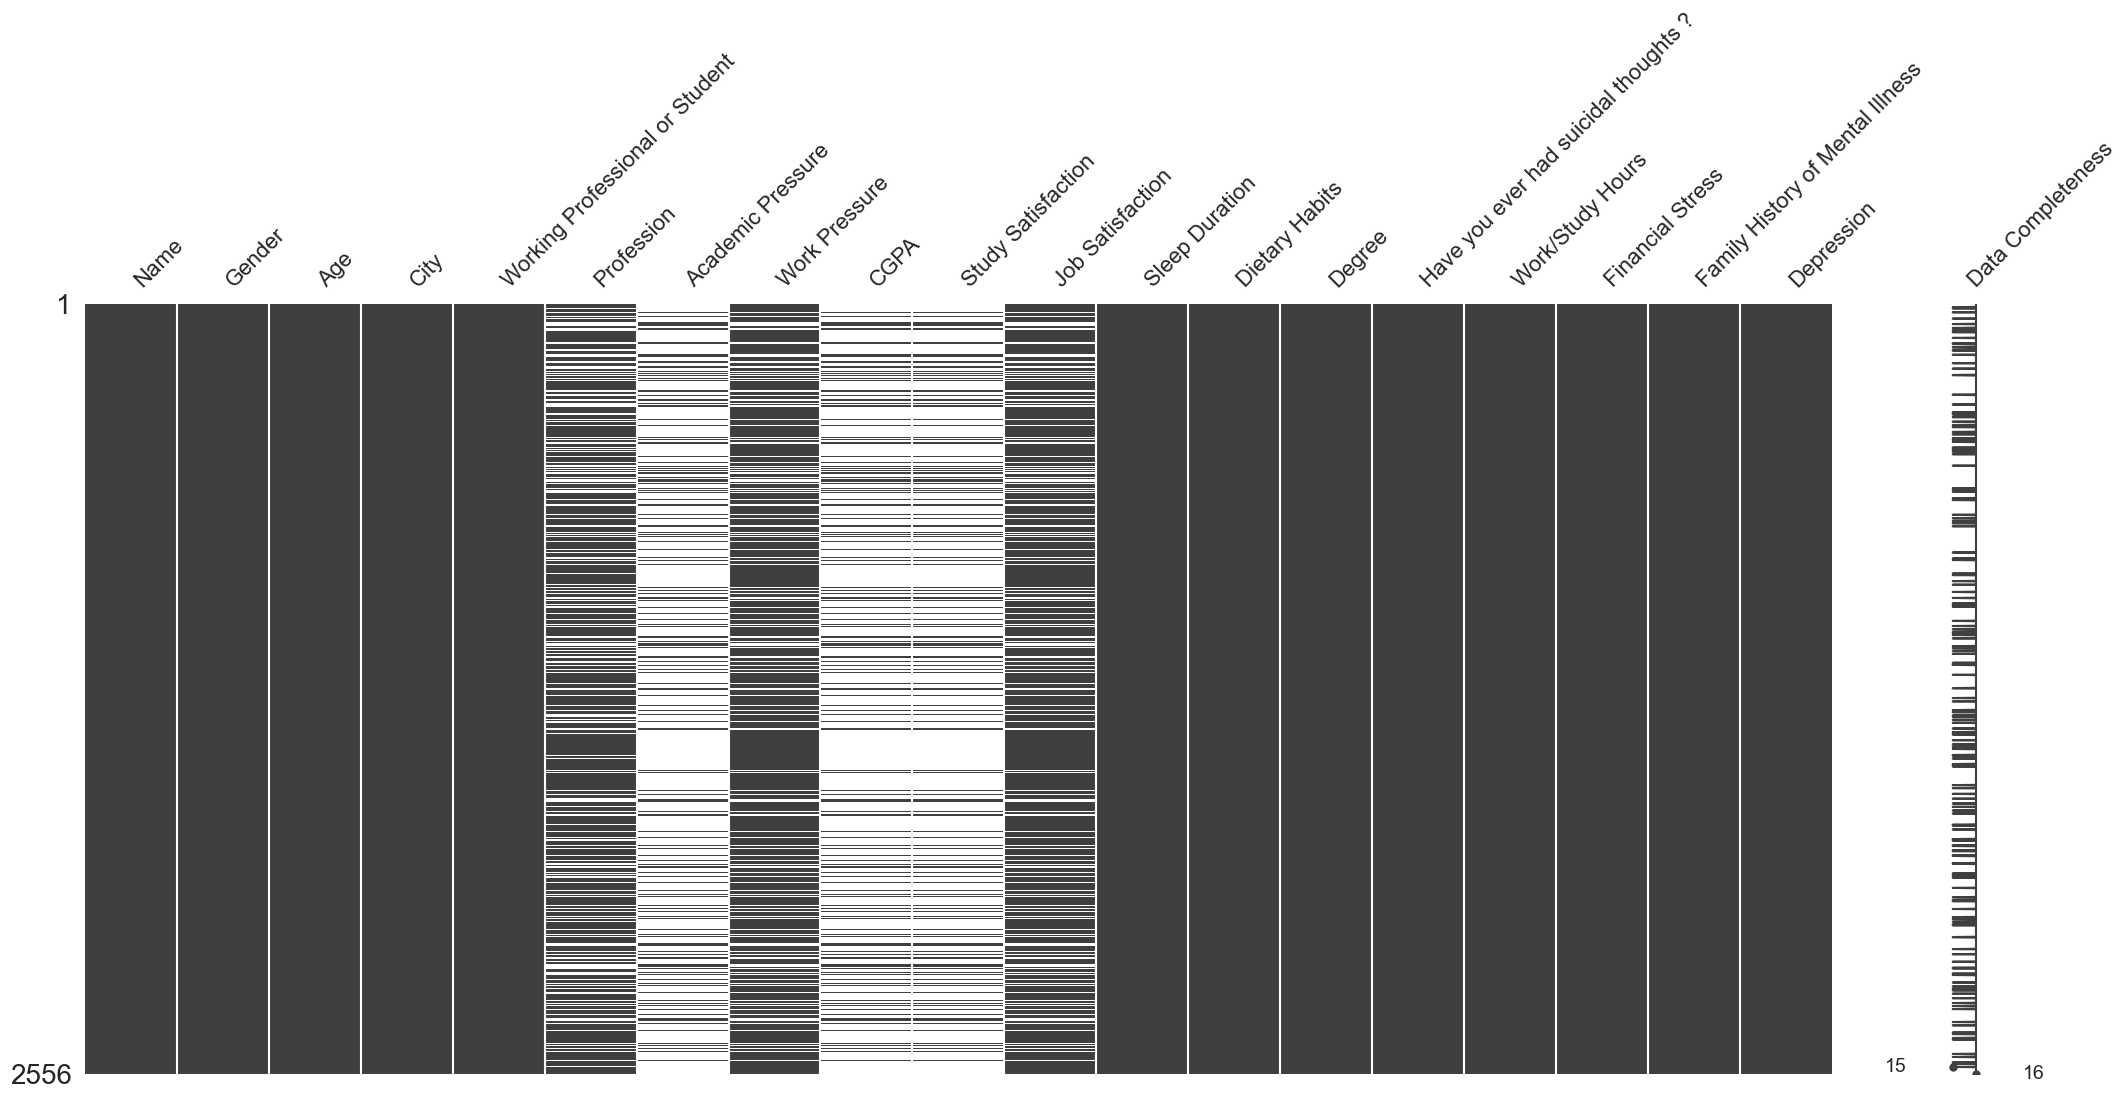

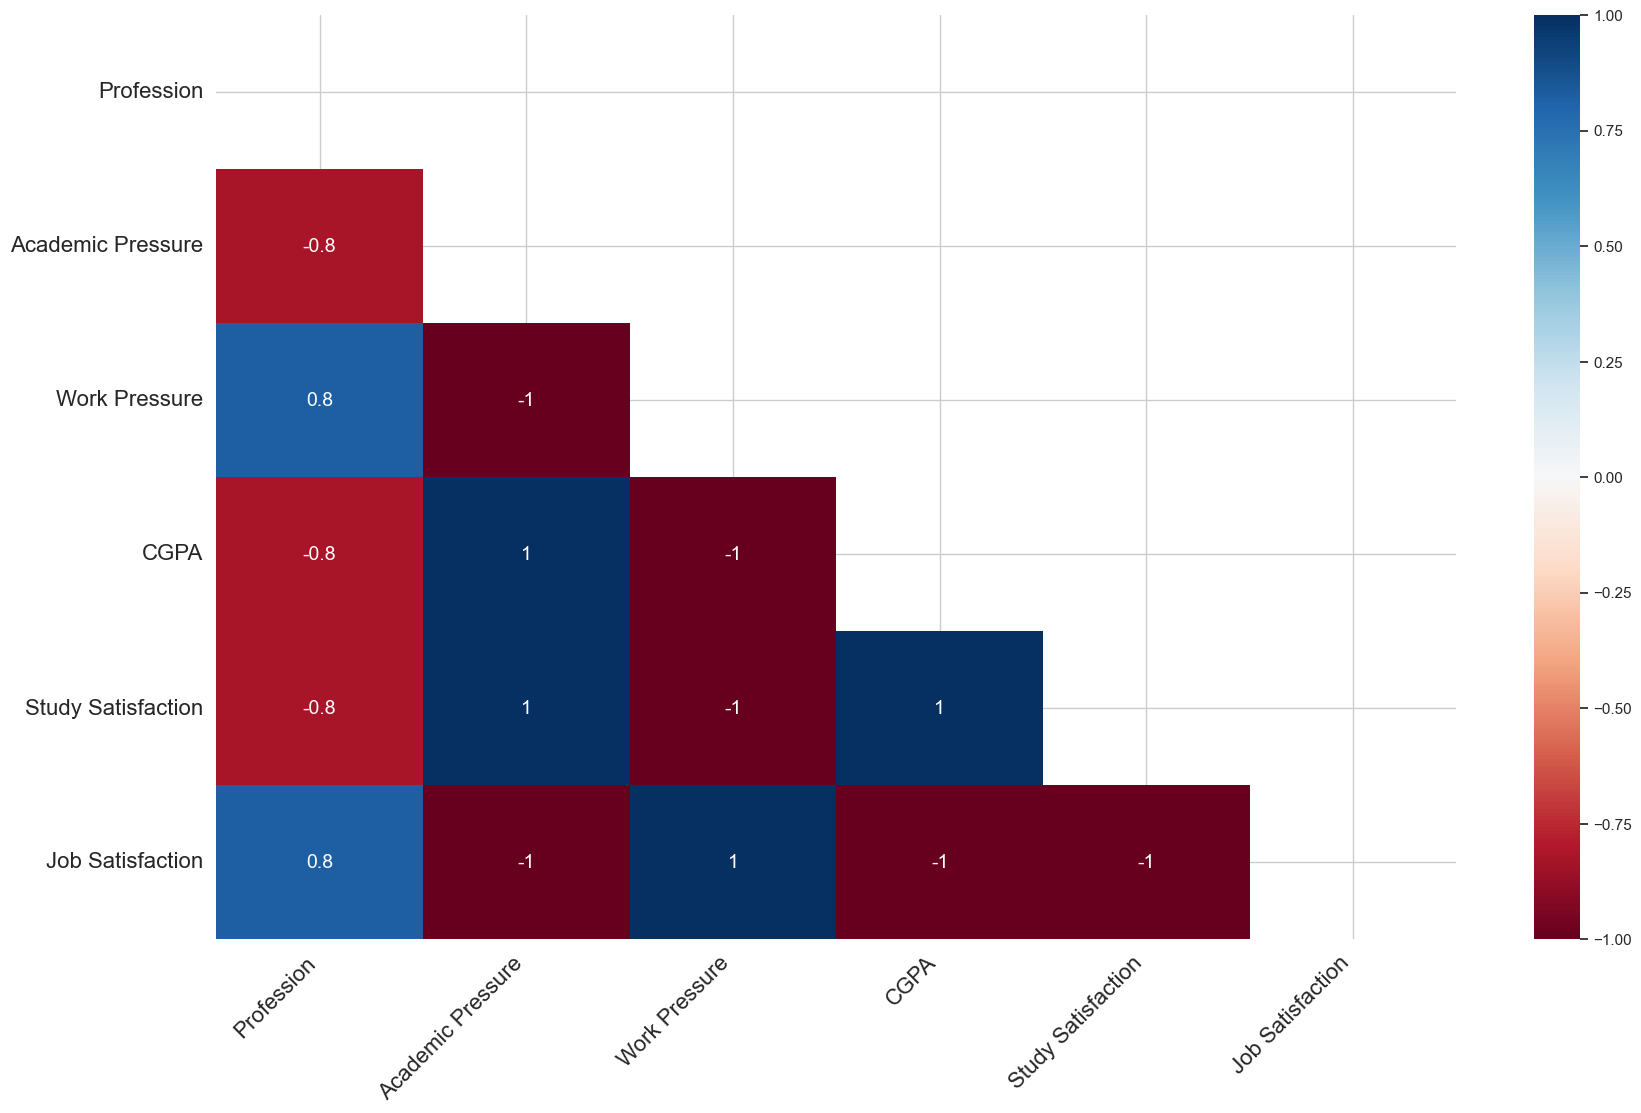

In [278]:
# Affichage des valeurs manquantes sous forme de matrice
msno.bar(df)
msno.matrix(df,labels=True)
msno.heatmap(df)

In [279]:
# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df

Nombre de valeurs manquantes  \
Study Satisfaction                                             2054   
CGPA                                                           2054   
Academic Pressure                                              2054   
Profession                                                      673   
Work Pressure                                                   502   
Job Satisfaction                                                502   
Name                                                              0   
Age                                                               0   
Gender                                                            0   
City                                                              0   
Working Professional or Student                                   0   
Sleep Duration                                                    0   
Dietary Habits                                                    0   
Degree                                                            0   
Have you ever had suicidal thoughts ?                             0   
Work/Study Hours                                                  0   
Financial Stress                                                  0   
Family History of Mental Illness                                  0   
Depression                                                        0   

                                       Proportion de valeurs manquantes  
Study Satisfaction                                             0.803599  
CGPA                                                           0.803599  
Academic Pressure                                              0.803599  
Profession                                                     0.263302  
Work Pressure                                                  0.196401  
Job Satisfaction                                               0.196401  
Name                                                           0.000000  
Age                                                            0.000000  
Gender                                                         0.000000  
City                                                           0.000000  
Working Professional or Student                                0.000000  
Sleep Duration                                                 0.000000  
Dietary Habits                                                 0.000000  
Degree                                                         0.000000  
Have you ever had suicidal thoughts ?                          0.000000  
Work/Study Hours                                               0.000000  
Financial Stress                                               0.000000  
Family History of Mental Illness                               0.000000  
Depression                                                     0.000000

On constate que 502 students exactement ont répondu au questionnaire et c'est pour cette raison que dans la colonne  working professionnal or student sur un total de 2556 individus, on a 502 students et le reste des working professional. C'est pour cette raison que c'est normal qu'on ai 502 individus dans les colonnes academic pressure, work pressure, CGPA et study satisfaction.
C'est également pour cette raison que dans la colonne job satisfaction on 502 valeurs manquantes car ce sont des students qui n'ont pas renseignés la colonne job satisfaction. 
Concernant la colonne profession nous avons 502 lignes manquantes pour les students et 171 lignes manquantes pour les professionnels qui n'ont pas voulu remplir la colonne ou ont omis. 

CONCLUSION: nous allons supprimer les students de notre base de données et ne conserver que les professionnels car imputer des valeurs sur des colonnes qui ont moins de 70% de données occasionnera un biais au niveau des résultats.

In [280]:
# Supprimer les lignes où 'Academic Pressure' est NON NUL
df = df[~df['Academic Pressure'].notna()]
print(df) 


             Name  Gender  Age       City Working Professional or Student  \
0           Pooja  Female   37  Ghaziabad            Working Professional   
1         Reyansh    Male   60     Kalyan            Working Professional   
2           Manvi  Female   42     Bhopal            Working Professional   
3            Isha  Female   44      Thane            Working Professional   
4           Aarav    Male   48     Indore            Working Professional   
...           ...     ...  ...        ...                             ...   
2550       Prisha  Female   45   Srinagar            Working Professional   
2551  Raghavendra    Male   25  Bangalore            Working Professional   
2552         Pihu  Female   23       Pune            Working Professional   
2553         Sara  Female   24   Srinagar            Working Professional   
2554       Eshita  Female   56  Bangalore            Working Professional   

             Profession  Academic Pressure  Work Pressure  CGPA  \
0       

In [281]:
#suppression des colonnes Name, Degree, CGPA & study satisfaction
df = df.drop(['Name', 'Degree', 'CGPA', 'Study Satisfaction'], axis=1)
print (df)

      Gender  Age       City Working Professional or Student  \
0     Female   37  Ghaziabad            Working Professional   
1       Male   60     Kalyan            Working Professional   
2     Female   42     Bhopal            Working Professional   
3     Female   44      Thane            Working Professional   
4       Male   48     Indore            Working Professional   
...      ...  ...        ...                             ...   
2550  Female   45   Srinagar            Working Professional   
2551    Male   25  Bangalore            Working Professional   
2552  Female   23       Pune            Working Professional   
2553  Female   24   Srinagar            Working Professional   
2554  Female   56  Bangalore            Working Professional   

             Profession  Academic Pressure  Work Pressure  Job Satisfaction  \
0               Teacher                NaN            2.0               4.0   
1     Financial Analyst                NaN            4.0               3

In [282]:
df = df.drop(['Academic Pressure', 'Working Professional or Student'], axis=1)
print(df)

      Gender  Age       City         Profession  Work Pressure  \
0     Female   37  Ghaziabad            Teacher            2.0   
1       Male   60     Kalyan  Financial Analyst            4.0   
2     Female   42     Bhopal            Teacher            2.0   
3     Female   44      Thane            Teacher            3.0   
4       Male   48     Indore     UX/UI Designer            4.0   
...      ...  ...        ...                ...            ...   
2550  Female   45   Srinagar            Teacher            1.0   
2551    Male   25  Bangalore         Consultant            1.0   
2552  Female   23       Pune            Teacher            3.0   
2553  Female   24   Srinagar         HR Manager            1.0   
2554  Female   56  Bangalore   Business Analyst            2.0   

      Job Satisfaction     Sleep Duration Dietary Habits  \
0                  4.0          7-8 hours       Moderate   
1                  3.0          5-6 hours      Unhealthy   
2                  3.0     

In [283]:
df['Profession'].unique()
print(df['Profession'].unique())

['Teacher' 'Financial Analyst' 'UX/UI Designer' 'Civil Engineer'
 'Accountant' 'Lawyer' 'Content Writer' nan 'Pilot' 'Customer Support'
 'Judge' 'Architect' 'HR Manager' 'Digital Marketer' 'Sales Executive'
 'Business Analyst' 'Mechanical Engineer' 'Consultant' 'Data Scientist'
 'Pharmacist' 'Software Engineer' 'Travel Consultant' 'Manager'
 'Entrepreneur' 'Doctor' 'Researcher' 'Plumber' 'Finanancial Analyst'
 'Marketing Manager' 'Educational Consultant' 'Chemist' 'Research Analyst'
 'Chef' 'Electrician' 'Graphic Designer' 'Investment Banker']


REGROUPONS LA VARIABLE PROFESSION EN 7 MODALITES 
1. EDUCATION & ENSEIGNEMENT : Teacher, 
2. Créativité & Communication : UX/UI Designer, Graphic Designer, Content Writer, Digital Marketer, 
3. Droit/Autorité : Chef, Lawyer, Judge, 
4. sciences & recherche : Researcher, Research Analyst, Chemist, Pharmacist, Doctor,
5. Ingénierie & Informatique : Software Engineer, Data Scientist, Mechanical Engineer, Civil Engineer, Business Analyst
6. Management & conseil :  Manager, Marketing Manager, Financial Analyst, Finanancial Analyst, Investment Banker, Accountant, Architect, customer Support, HR Manager, Plumber, Electrician, pilot, sales Executive
7. entrepreneur/consultant : Entrepreneur, Consultant, Travel Consultant, Educational Consultant


In [284]:
# Remplacer les valeurs manquantes de la colonne par 'Unknown'
df['Profession'] = df['Profession'].fillna('Unknown')

# Vérifier le résultat
print(df['Profession'].unique())


['Teacher' 'Financial Analyst' 'UX/UI Designer' 'Civil Engineer'
 'Accountant' 'Lawyer' 'Content Writer' 'Unknown' 'Pilot'
 'Customer Support' 'Judge' 'Architect' 'HR Manager' 'Digital Marketer'
 'Sales Executive' 'Business Analyst' 'Mechanical Engineer' 'Consultant'
 'Data Scientist' 'Pharmacist' 'Software Engineer' 'Travel Consultant'
 'Manager' 'Entrepreneur' 'Doctor' 'Researcher' 'Plumber'
 'Finanancial Analyst' 'Marketing Manager' 'Educational Consultant'
 'Chemist' 'Research Analyst' 'Chef' 'Electrician' 'Graphic Designer'
 'Investment Banker']


In [285]:
df.rename(columns={'Work/Study Hours': 'Work Hours'}, inplace=True)

df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [286]:
df.dtypes

Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work Hours                                 int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

ANALYSES DESCRIPTIVES UNIVARIEES 






In [287]:
#analyse descriptive du jeux de données
print(df.describe(include='all'))


       Gender          Age    City Profession  Work Pressure  \
count    2054  2054.000000    2054       2054    2054.000000   
unique      2          NaN      30         36            NaN   
top      Male          NaN  Mumbai    Teacher            NaN   
freq     1066          NaN      86        322            NaN   
mean      NaN    42.171860     NaN        NaN       3.021908   
std       NaN    11.461202     NaN        NaN       1.417312   
min       NaN    18.000000     NaN        NaN       1.000000   
25%       NaN    35.000000     NaN        NaN       2.000000   
50%       NaN    43.000000     NaN        NaN       3.000000   
75%       NaN    51.750000     NaN        NaN       4.000000   
max       NaN    60.000000     NaN        NaN       5.000000   

        Job Satisfaction Sleep Duration Dietary Habits  \
count        2054.000000           2054           2054   
unique               NaN              4              3   
top                  NaN      7-8 hours      Unhealthy   

ANALYSES UNIVARIEES DES VARIABLES QUALITATIVES 

Age


C:\Users\franc\AppData\Local\Temp\ipykernel_24584\1690334495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=quant_vars, palette="Set2")


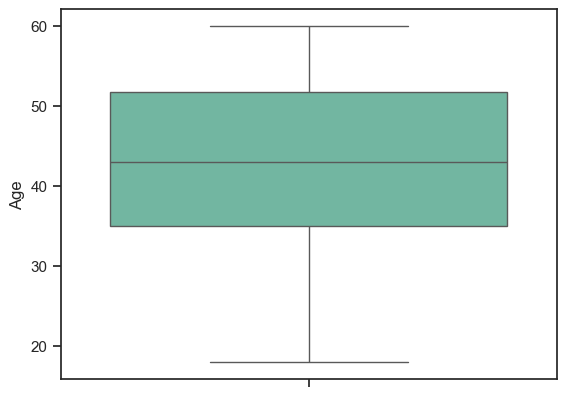

Work Pressure


C:\Users\franc\AppData\Local\Temp\ipykernel_24584\1690334495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=quant_vars, palette="Set2")


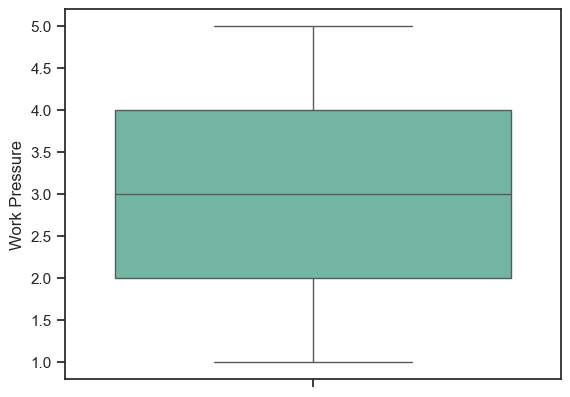

Job Satisfaction


C:\Users\franc\AppData\Local\Temp\ipykernel_24584\1690334495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=quant_vars, palette="Set2")


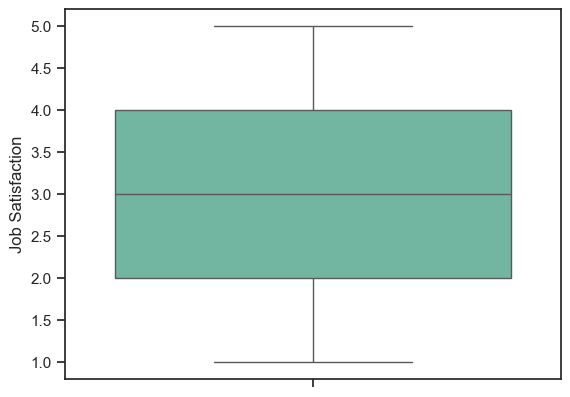

Work Hours


C:\Users\franc\AppData\Local\Temp\ipykernel_24584\1690334495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=quant_vars, palette="Set2")


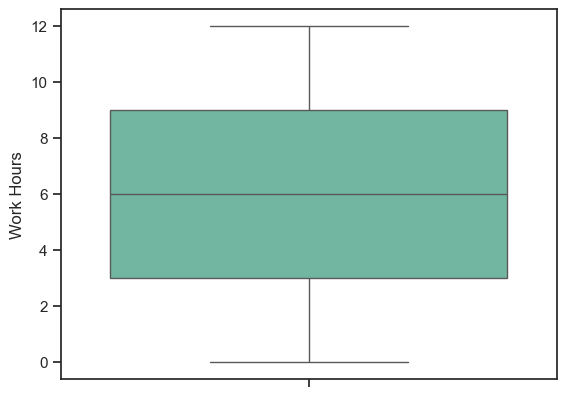

C:\Users\franc\AppData\Local\Temp\ipykernel_24584\1690334495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=quant_vars, palette="Set2")


Financial Stress


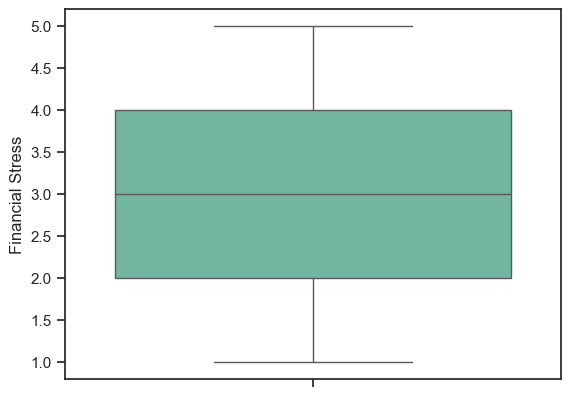

In [288]:
# Analyse descriptive des variables quantitatives

# Sélection des variables quantitatives
quant_vars = df.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, palette="Set2")
    plt.show()

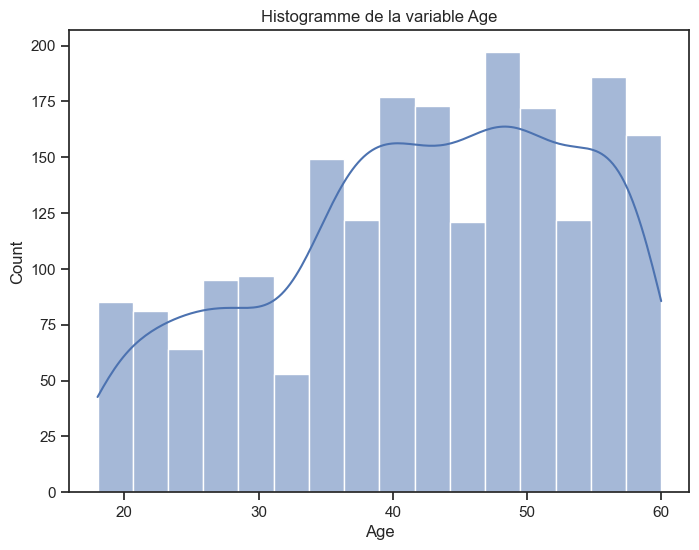

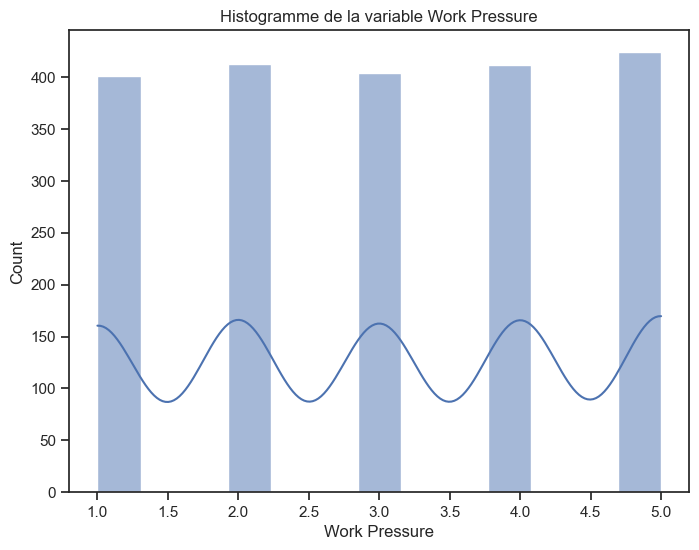

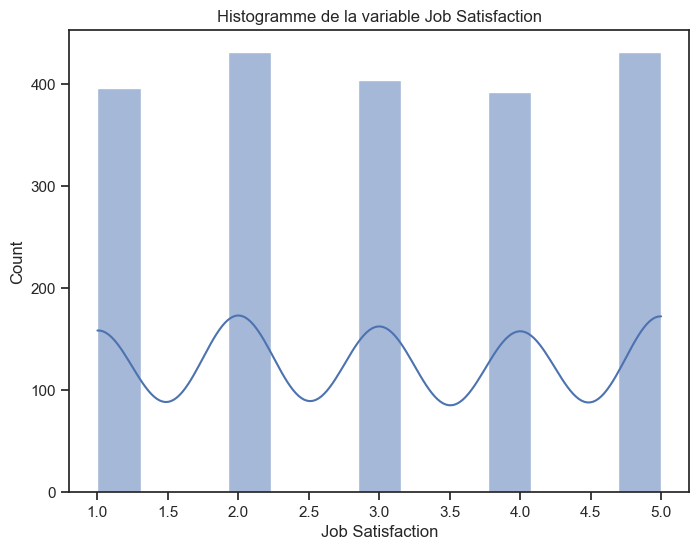

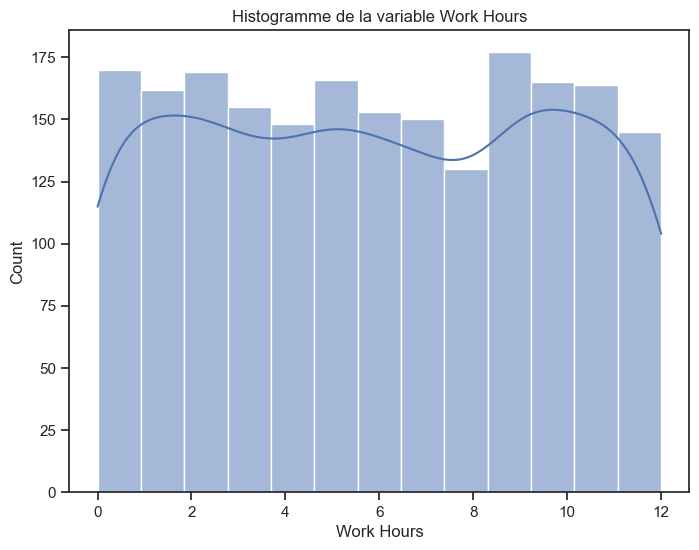

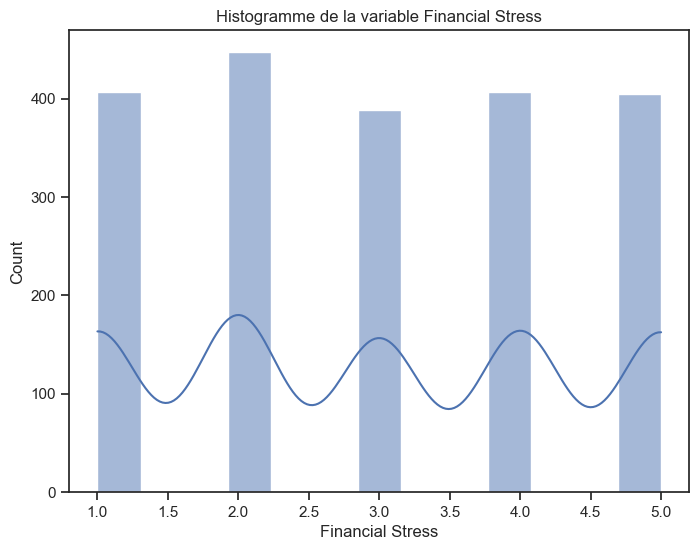

In [289]:
# Analyse de la normalité des variables quantitatives
from scipy.stats import shapiro

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in quant_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

In [290]:
from scipy.stats import shapiro

# Initialisation du DataFrame pour les résultats des tests de normalité
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in quant_vars:
    stat, p = shapiro(quant_vars[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    
    # Ajout de la nouvelle ligne au DataFrame
    normality_df.loc[len(normality_df)] = [var, p, normality]

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)


           Variable       P-value   Normality
0               Age  1.626908e-23  Not Normal
1     Work Pressure  2.557649e-36  Not Normal
2  Job Satisfaction  2.272497e-36  Not Normal
3        Work Hours  3.122509e-28  Not Normal
4  Financial Stress  2.751089e-36  Not Normal


Gender


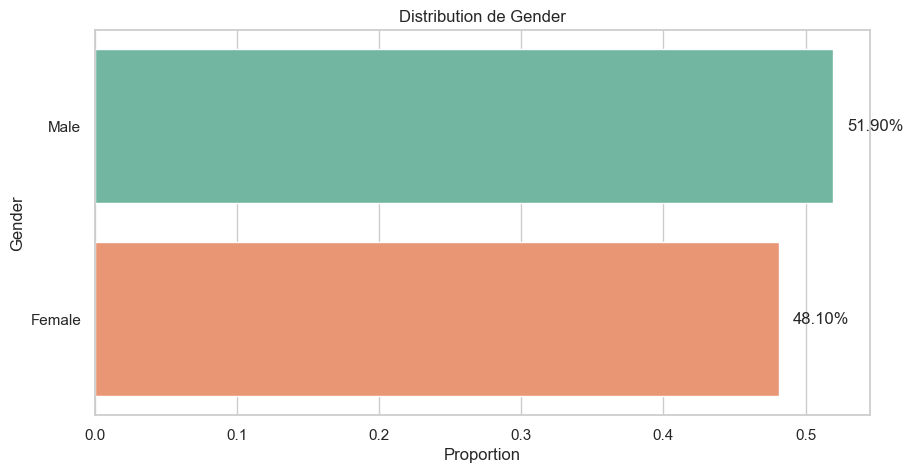

City


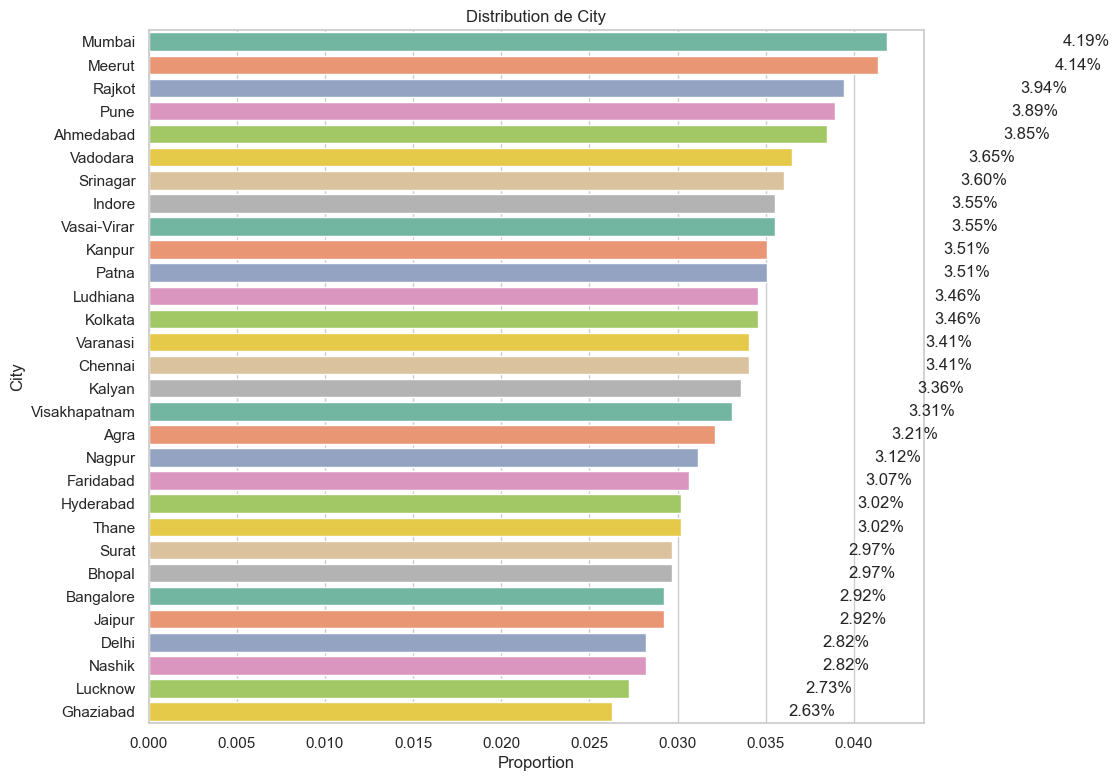

Profession


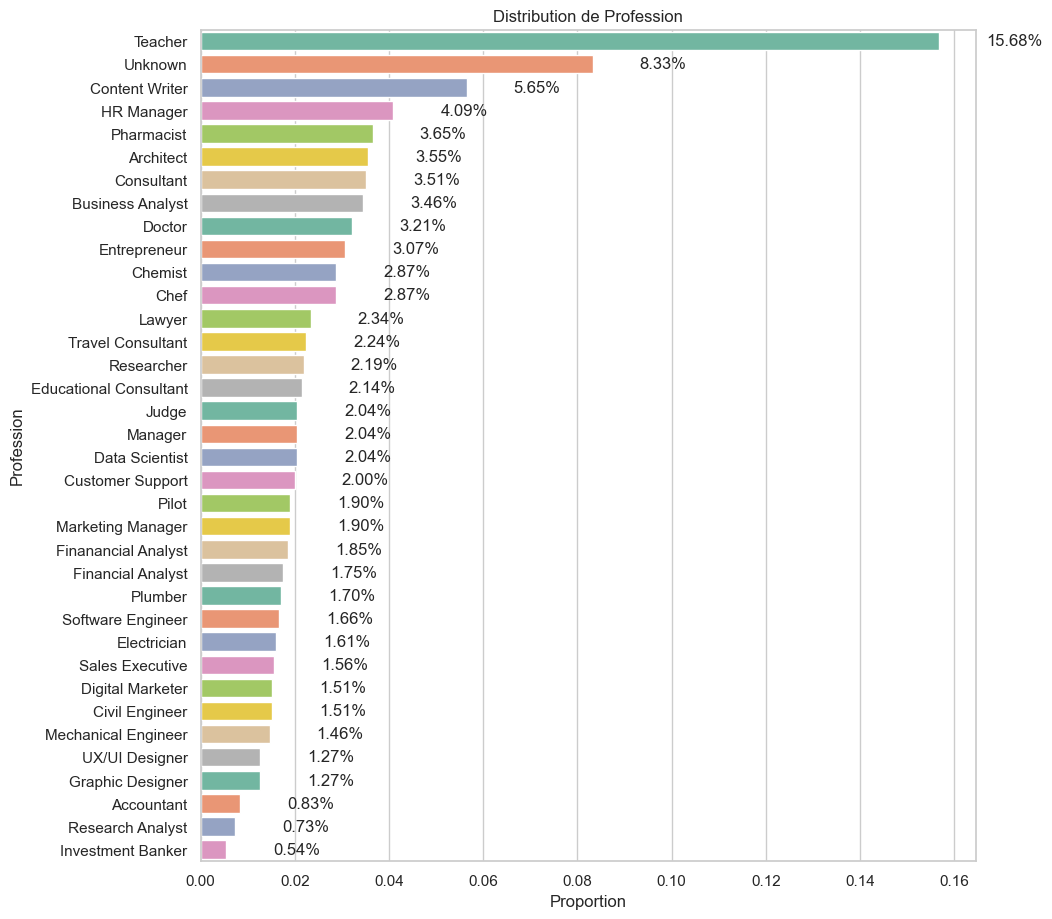

Sleep Duration


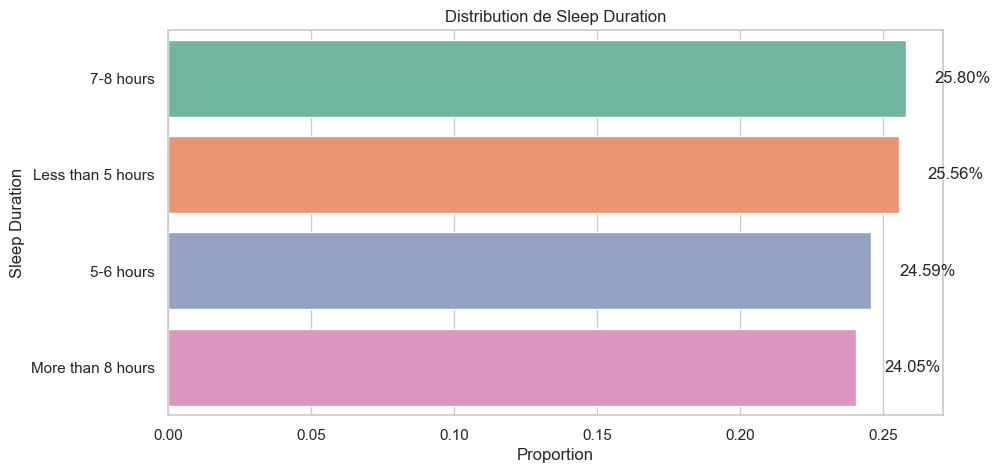

Dietary Habits


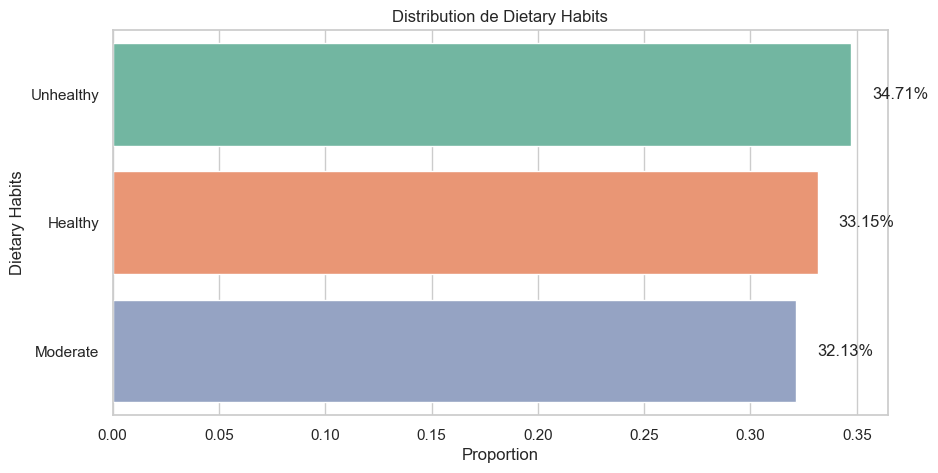

Have you ever had suicidal thoughts ?


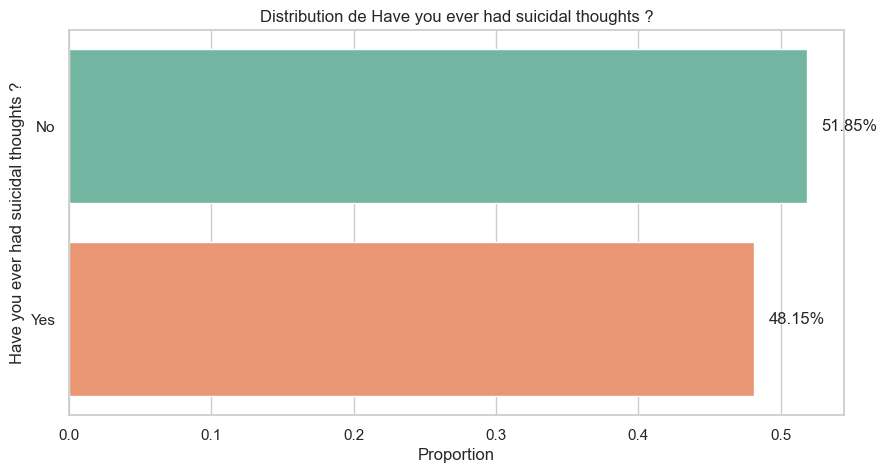

Family History of Mental Illness


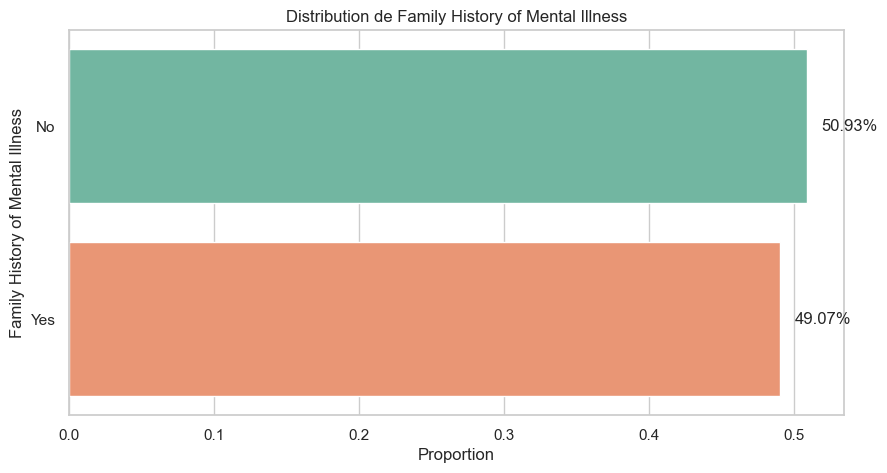

Depression


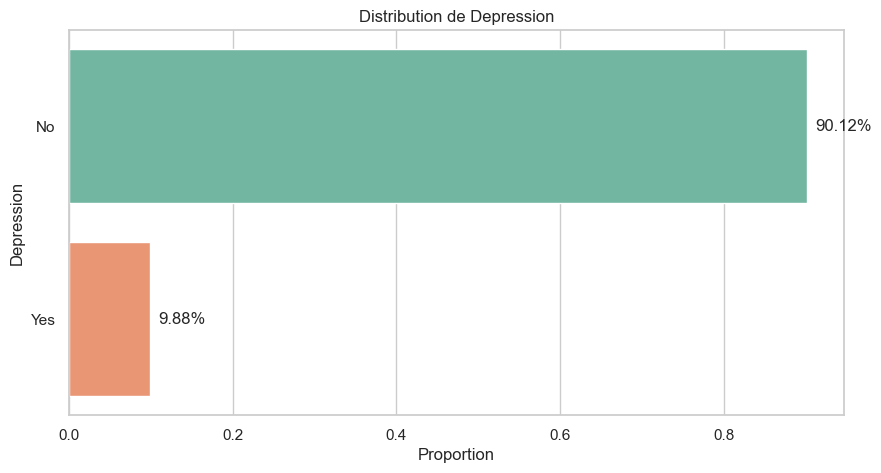

In [291]:
#Analyse des variables qualitatives

# Sélection des variables qualitatives
qual_vars = df.select_dtypes(include=['object'])

# Configuration du style Seaborn
sns.set(style="whitegrid")

# Boucle pour tracer les barplots horizontaux pour chaque variable qualitative
for var in qual_vars:
    print(var)
    
    # Calcul des proportions
    prop_df = qual_vars[var].value_counts(normalize=True).reset_index()
    prop_df.columns = ['Catégorie', 'Proportion']
    
    # Tracé du barplot horizontal
    plt.figure(figsize=(10, max(5, len(prop_df) * 0.3)))  # Ajuste la hauteur en fonction du nombre de catégories
    sns.barplot(y='Catégorie', x='Proportion', data=prop_df, palette="Set2", hue='Catégorie')

    # Ajout des labels
    plt.xlabel("Proportion")
    plt.ylabel(var)
    plt.title(f"Distribution de {var}")

    # Ajout des valeurs sur les barres
    for index, value in enumerate(prop_df['Proportion']):
        plt.text(value + 0.01, index, f"{value:.2%}", va='center')

    plt.show()


ANALYSES BIVARIEES DES VARIABLES 

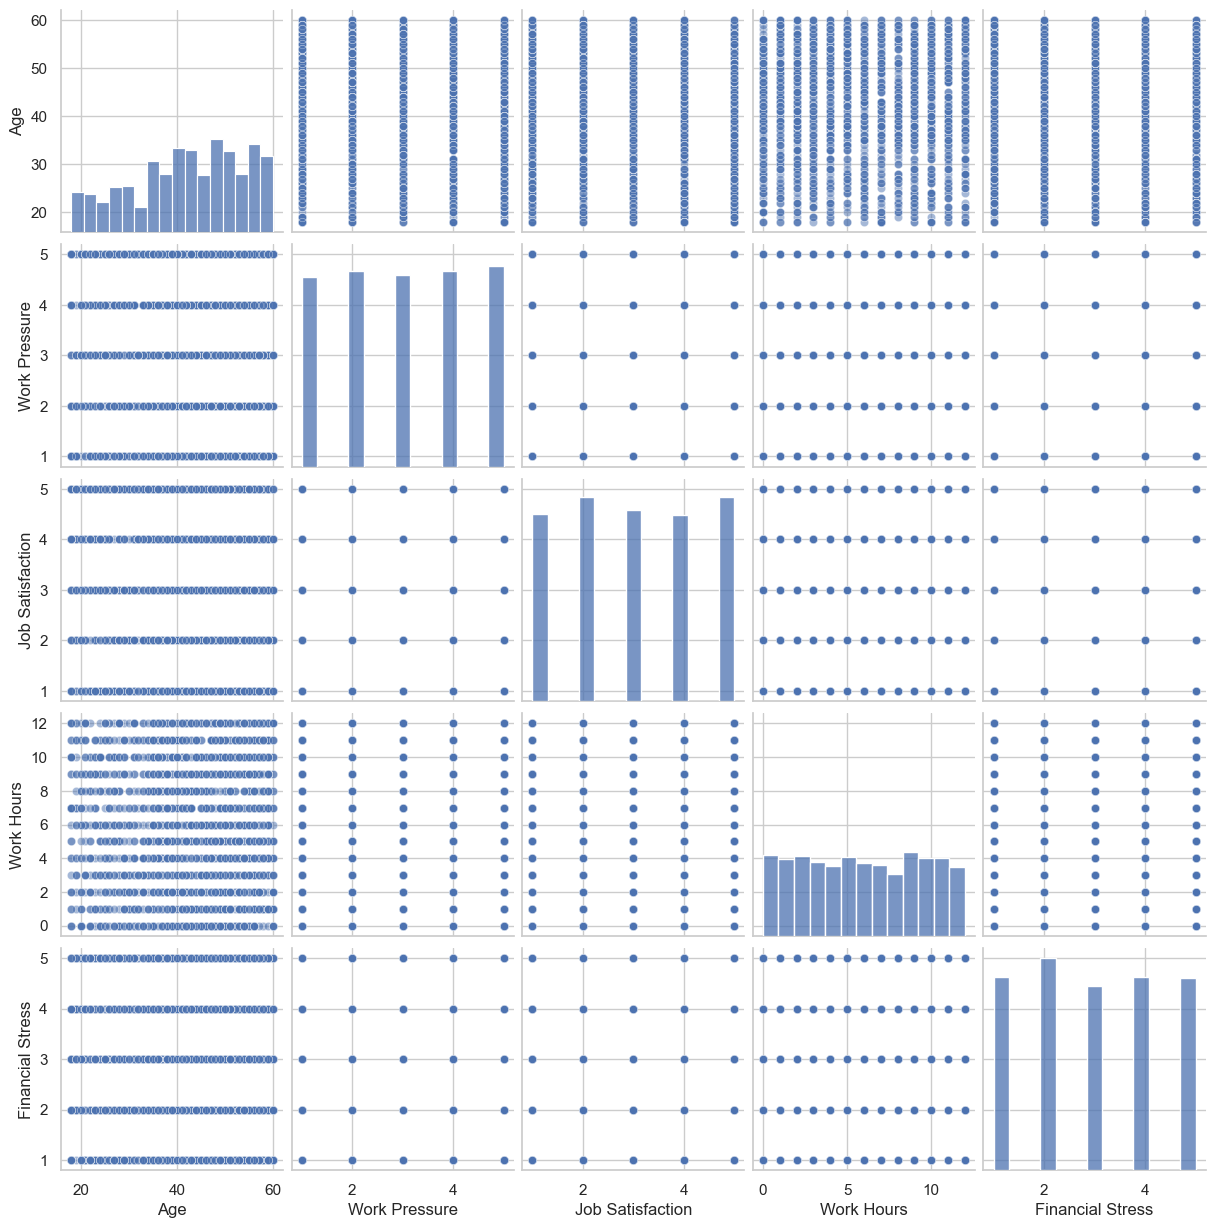

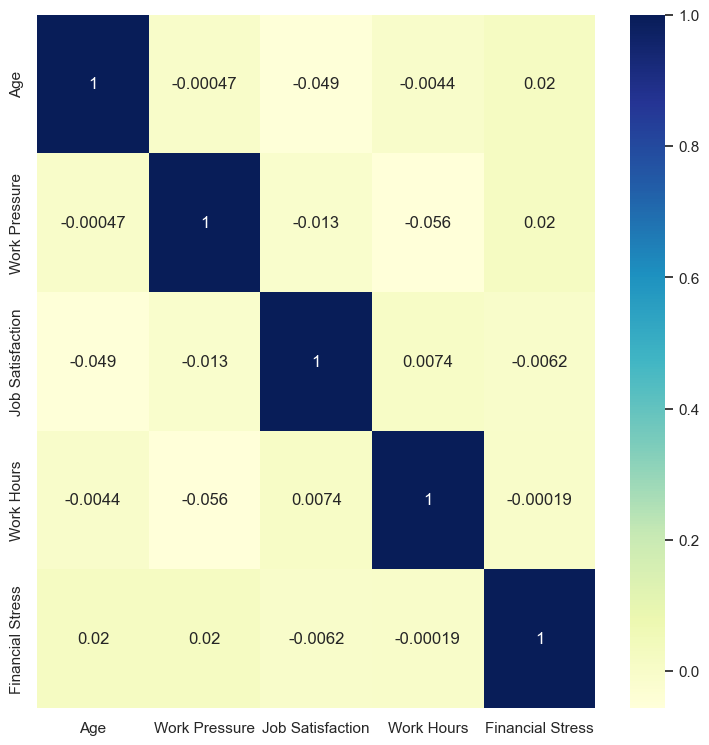

In [292]:
# analyses bivariées des variables quantitatives
quant_vars = df.select_dtypes(include=['float64', 'int64'])

# Tracer le pairplot pour les variables quantitatives
sns.pairplot(quant_vars, kind="scatter", plot_kws={'alpha':0.5})

# Afficher le graphique
plt.show()

# Obtenir le tableau de corélation et la heatmap (corrélation de pearson)

corr_matrix = quant_vars.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()


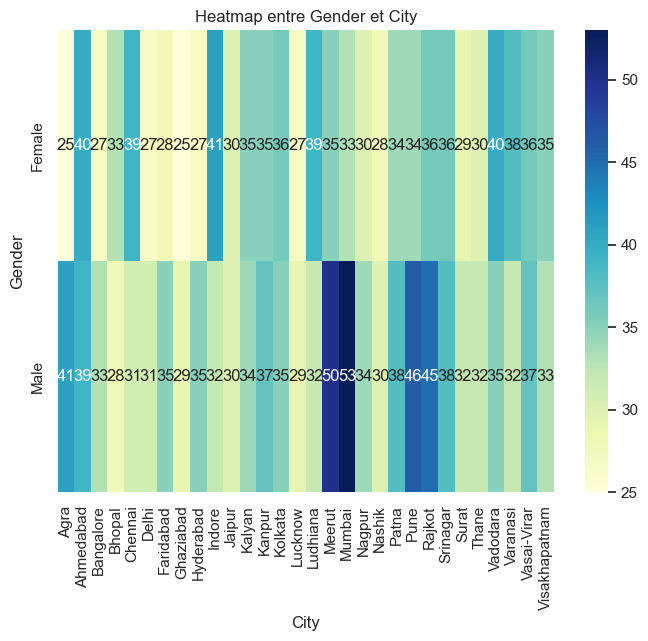

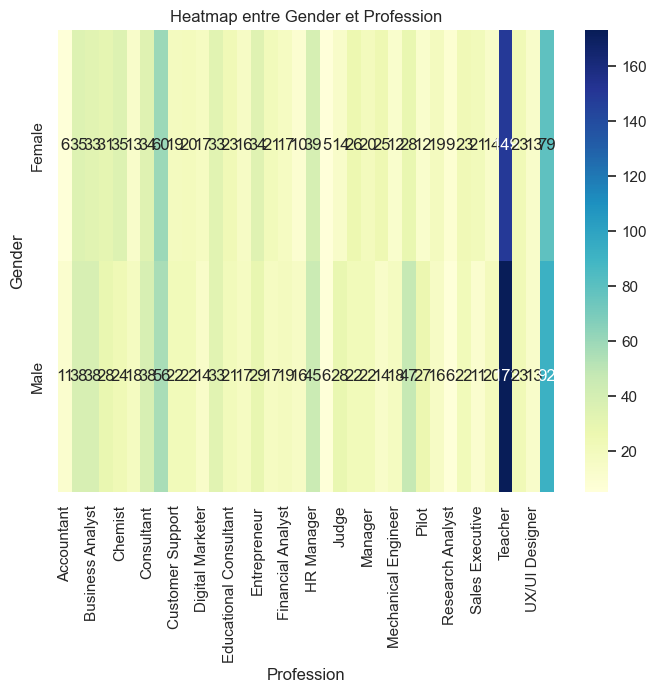

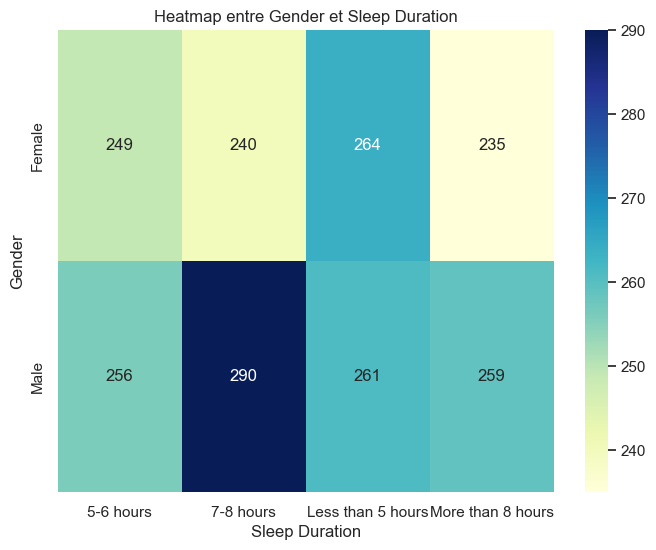

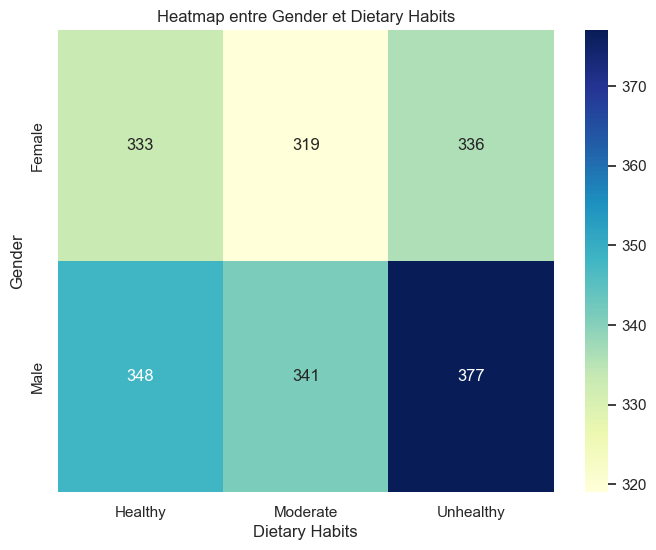

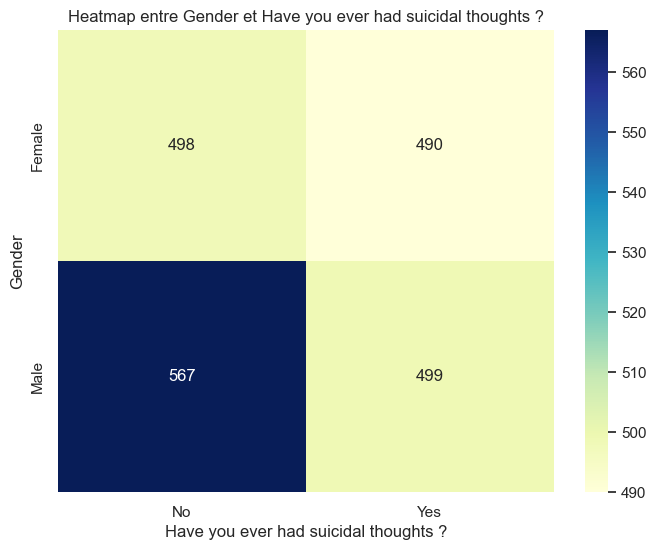

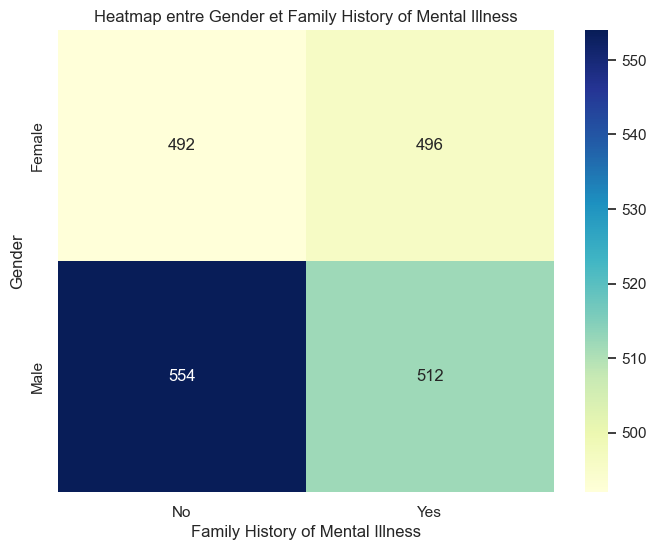

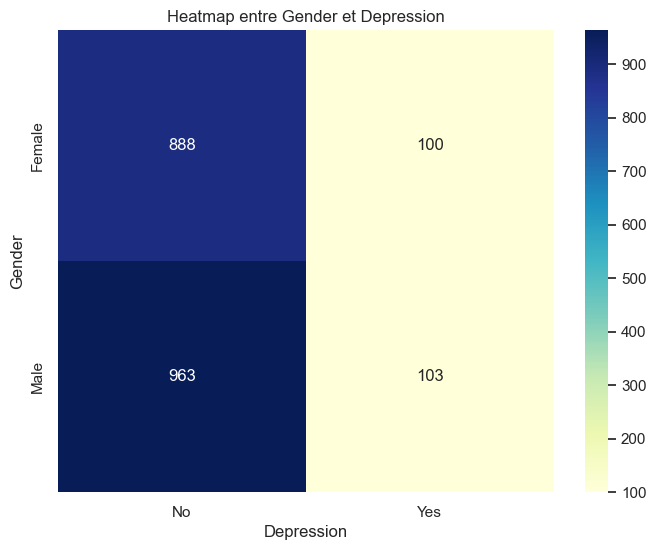

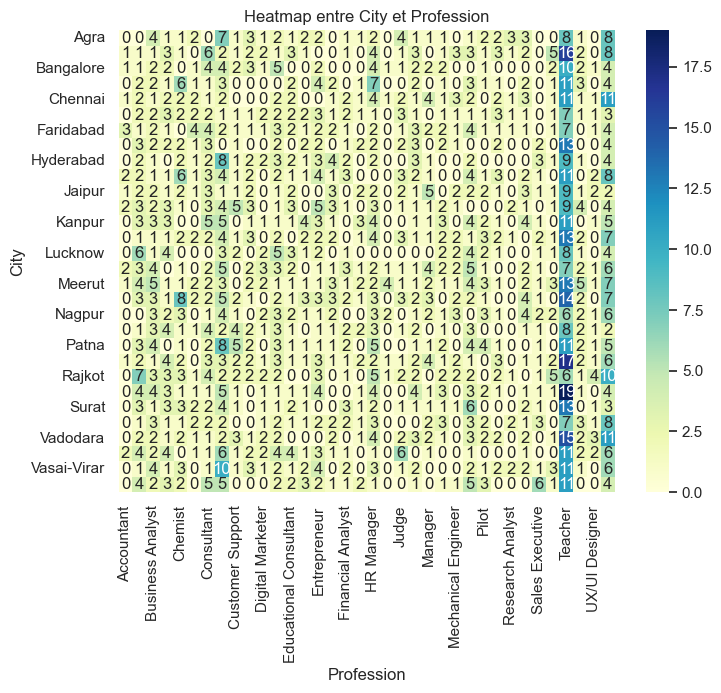

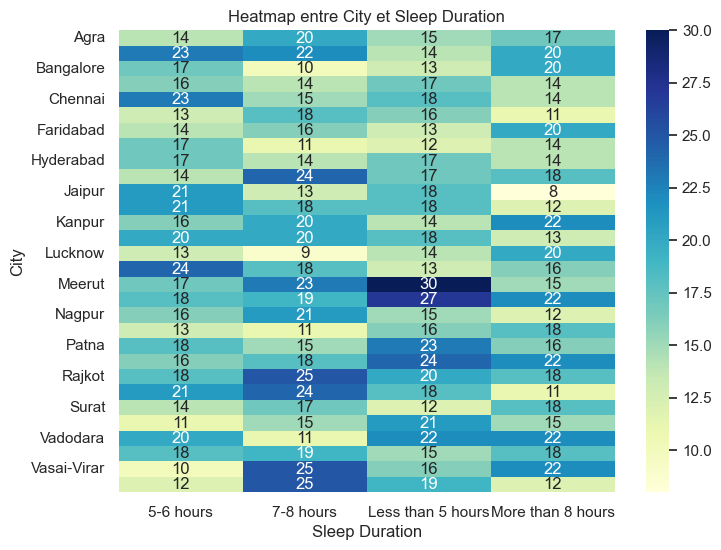

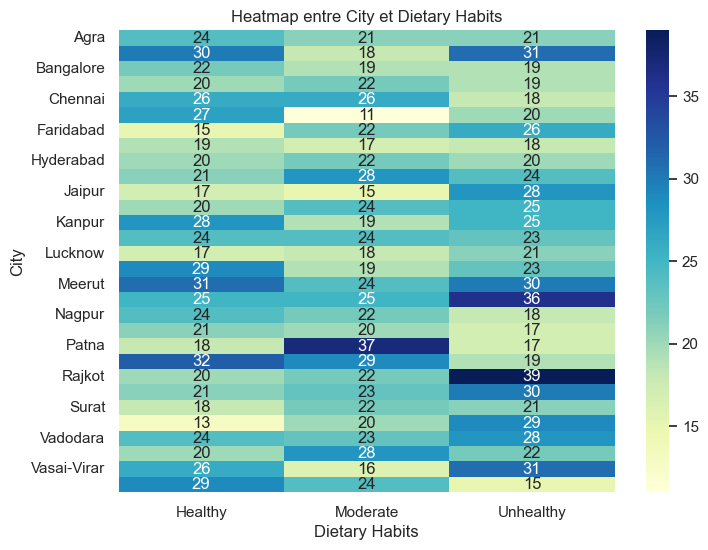

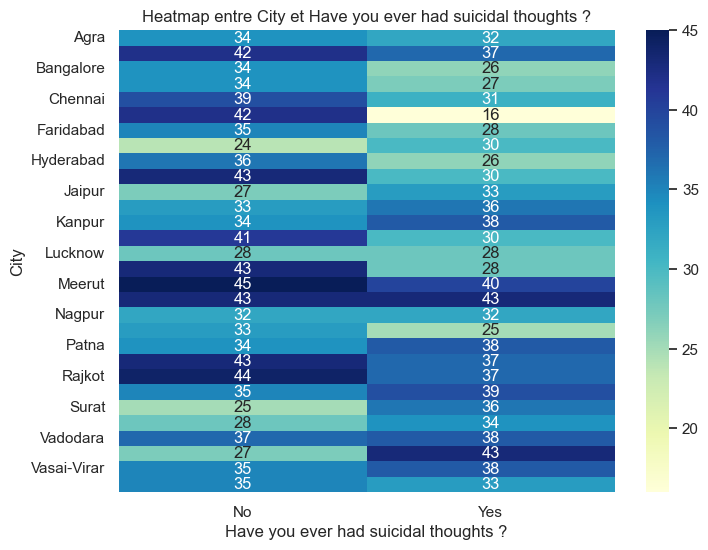

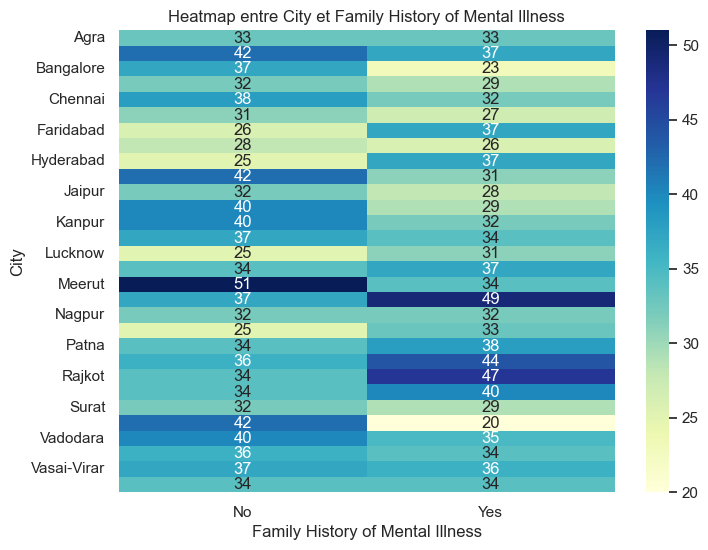

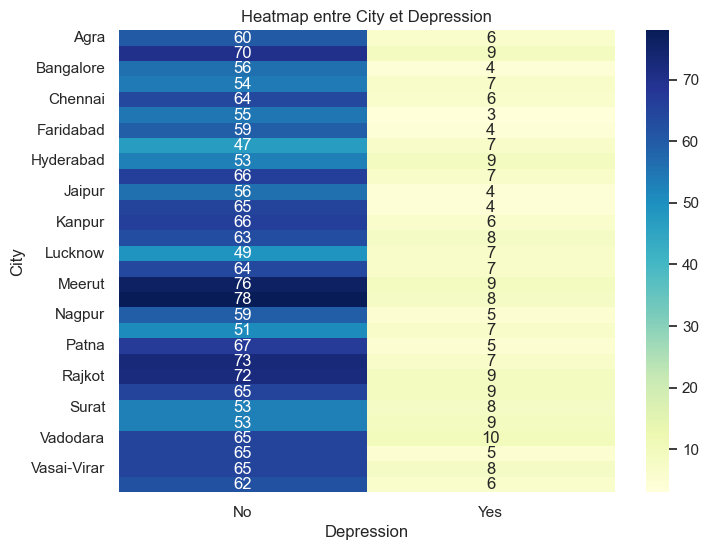

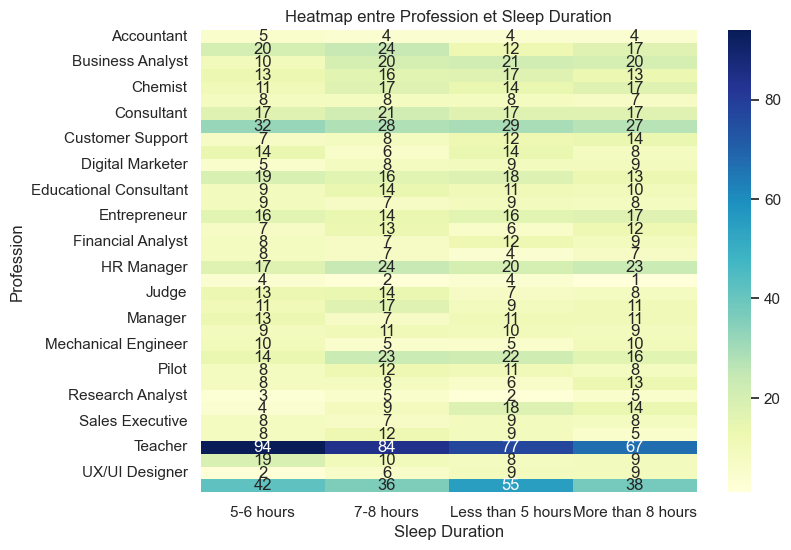

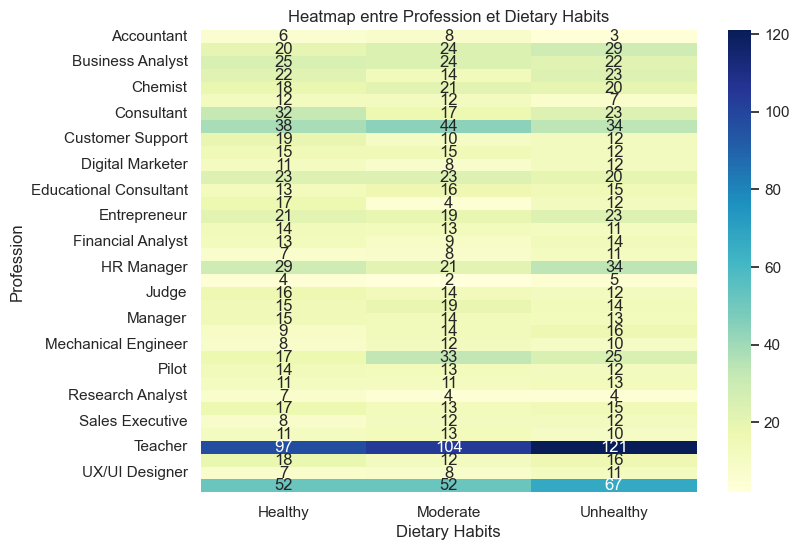

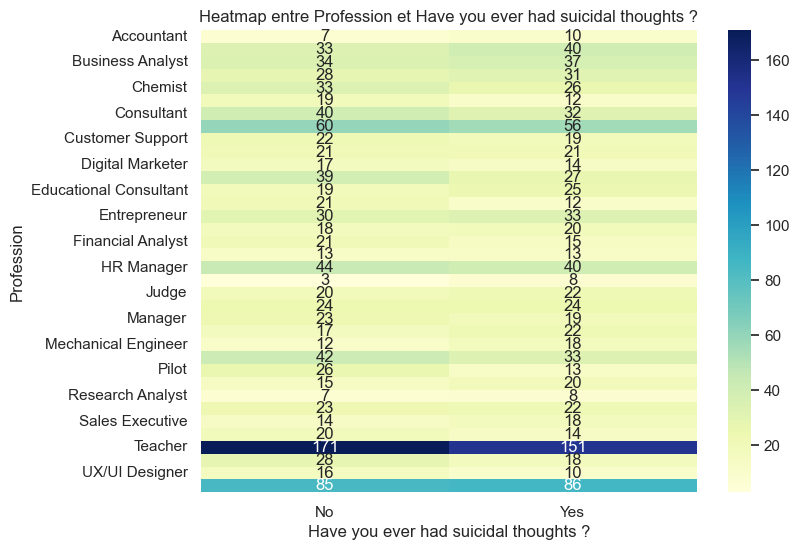

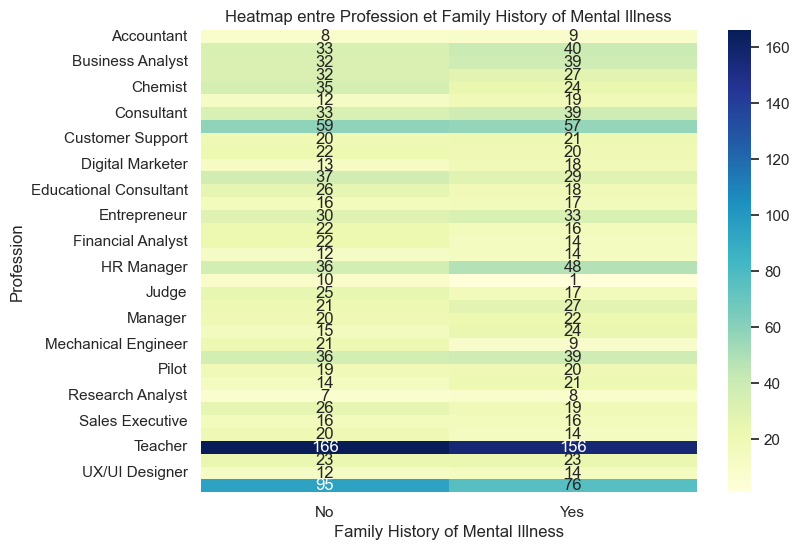

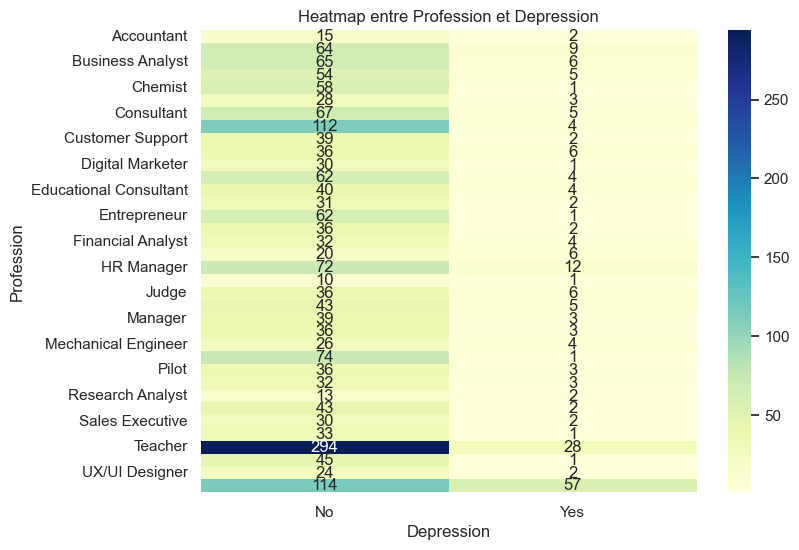

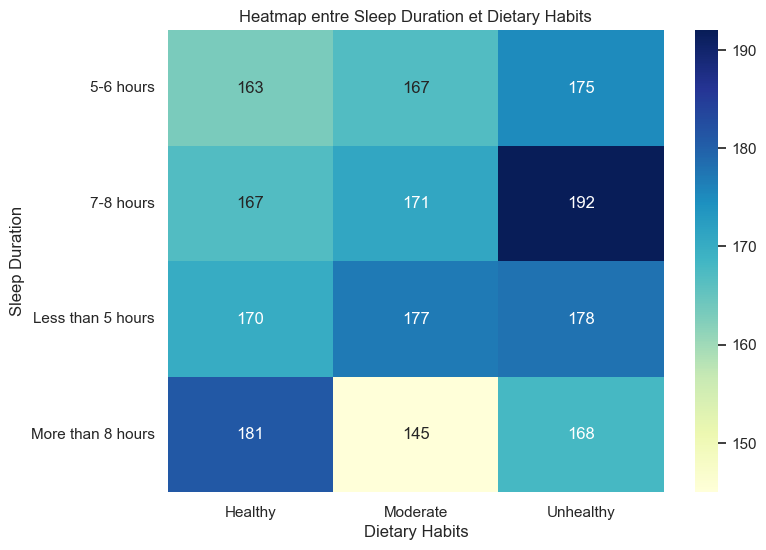

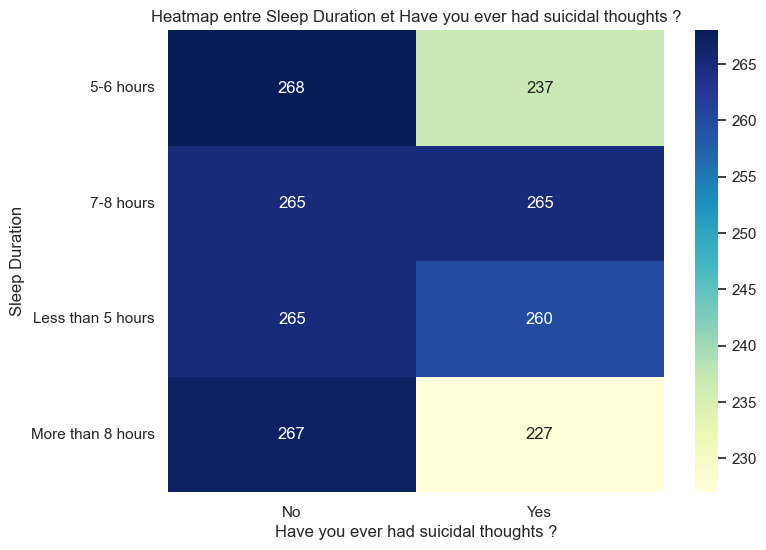

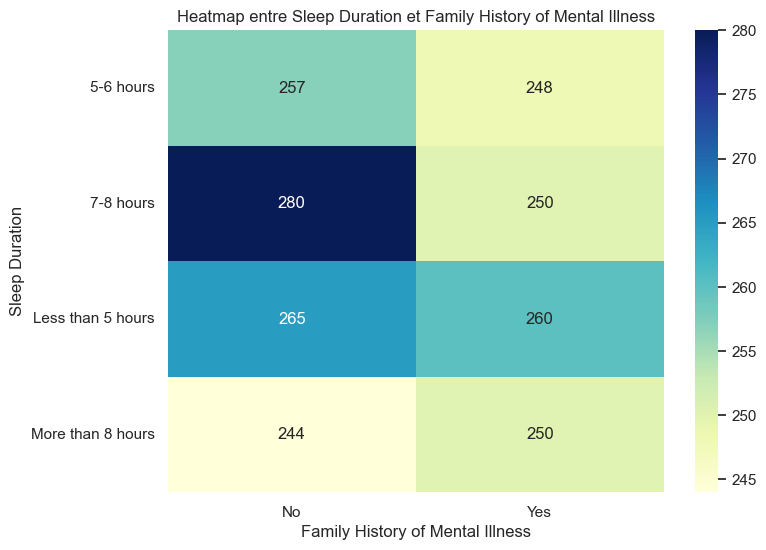

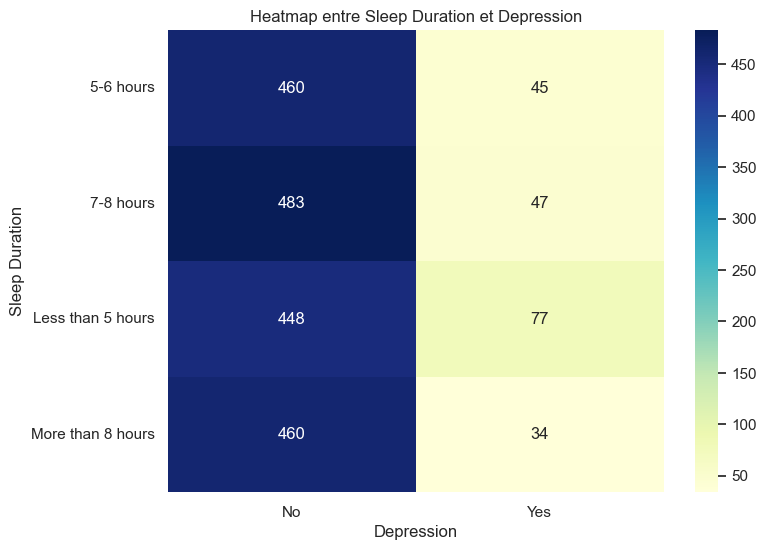

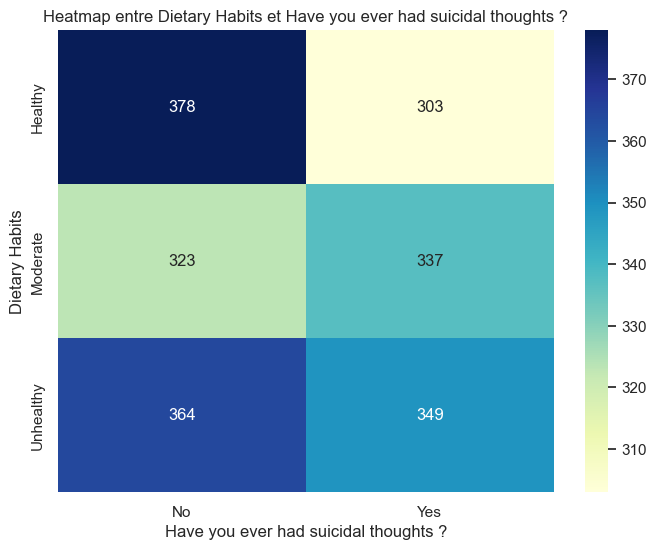

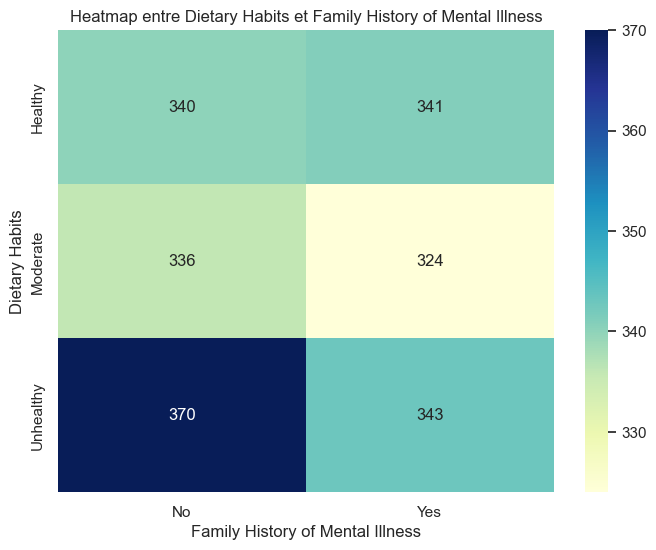

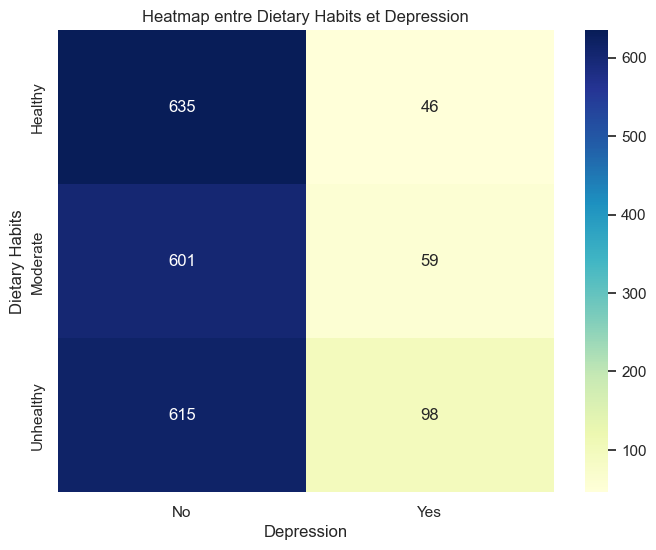

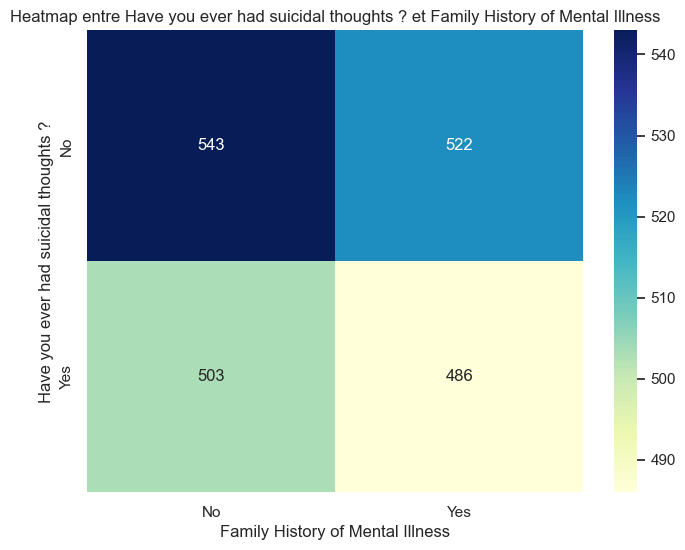

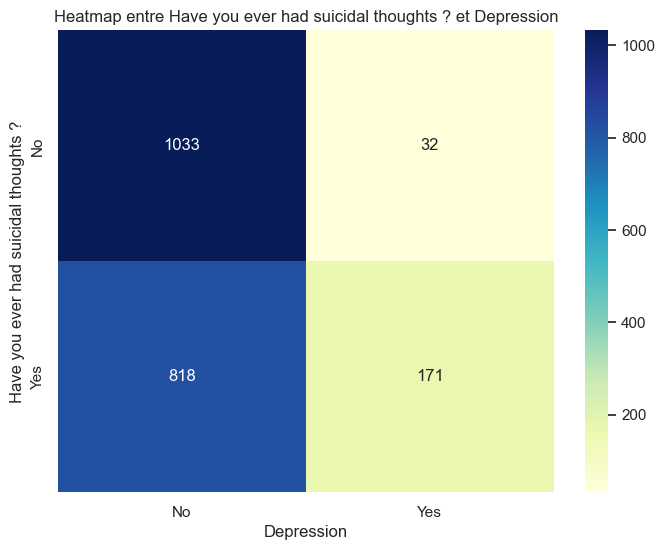

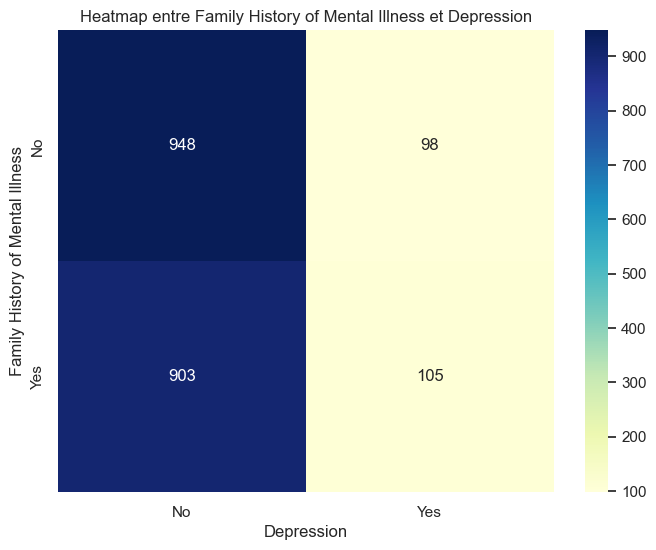

In [293]:
#Analyses bivariées variables qualitatives pour rechercher des associations entre elles


# 1. Sélectionner les variables qualitatives
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns

# 2. Créer des combinaisons de paires de variables qualitatives
combinations = list(itertools.combinations(qualitative_vars, 2))

# 3. Créer une heatmap pour chaque combinaison
for var1, var2 in combinations:
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(df[var1], df[var2])
    
    # Afficher la heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')  # fmt='d' pour afficher les nombres entiers
    plt.title(f'Heatmap entre {var1} et {var2}')
    plt.show()



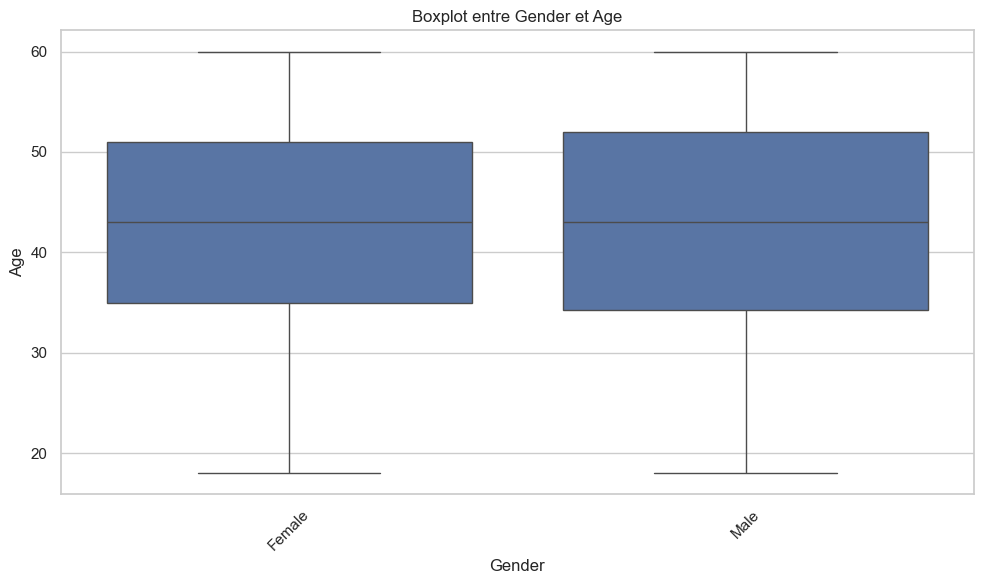

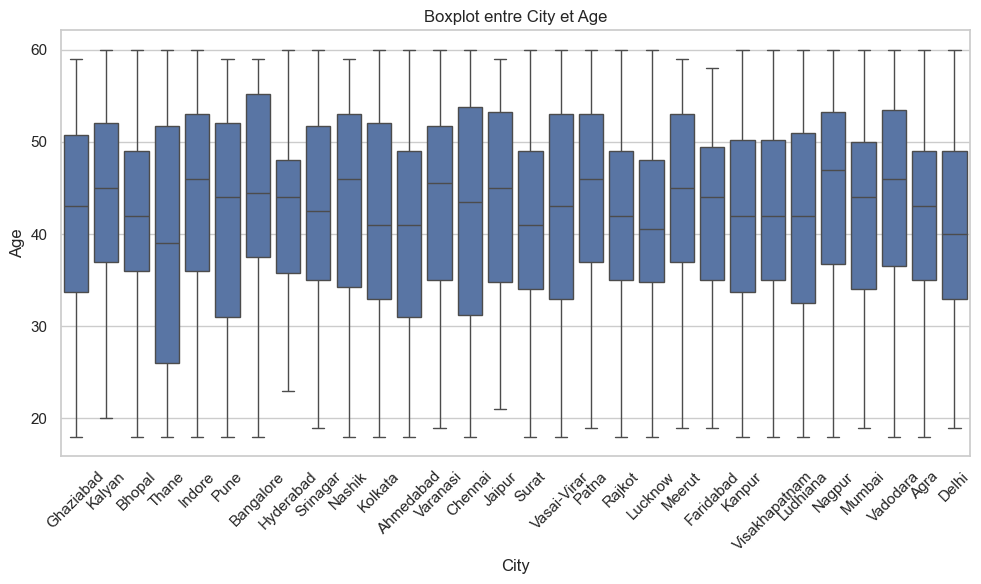

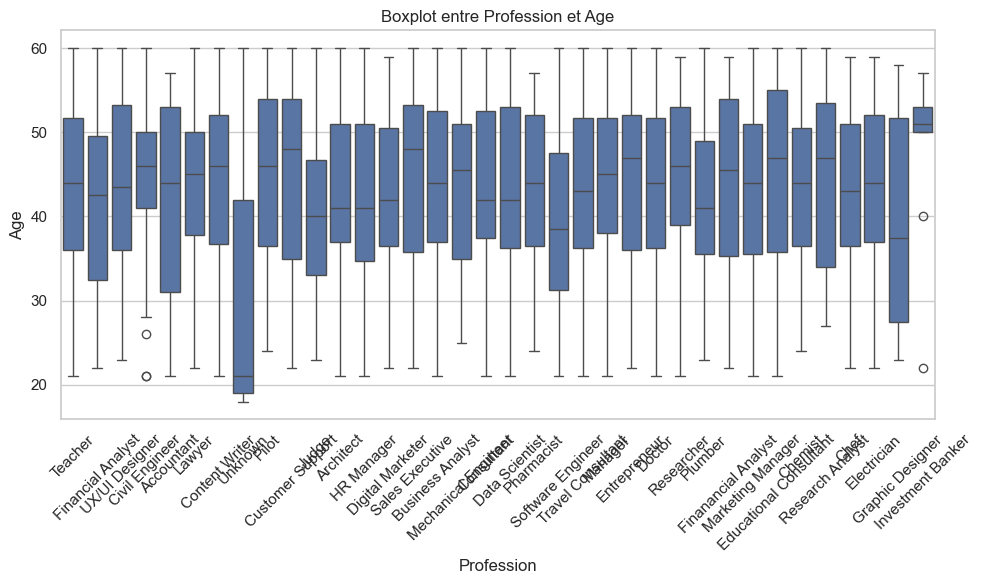

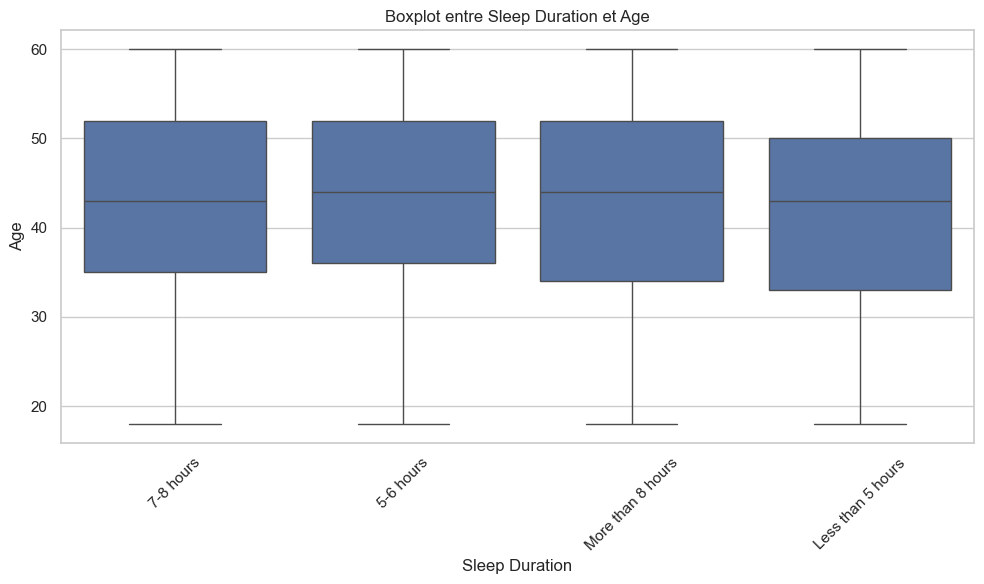

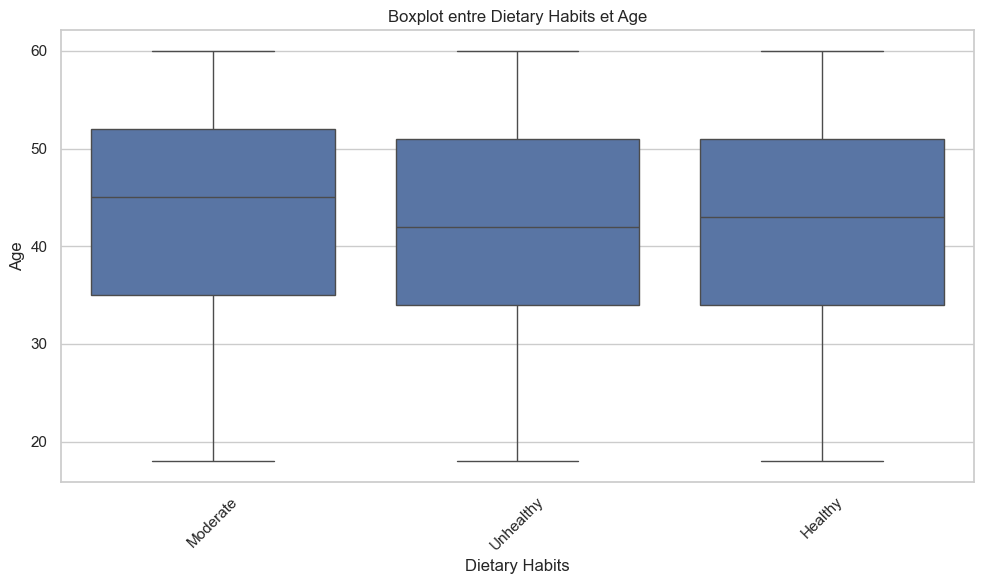

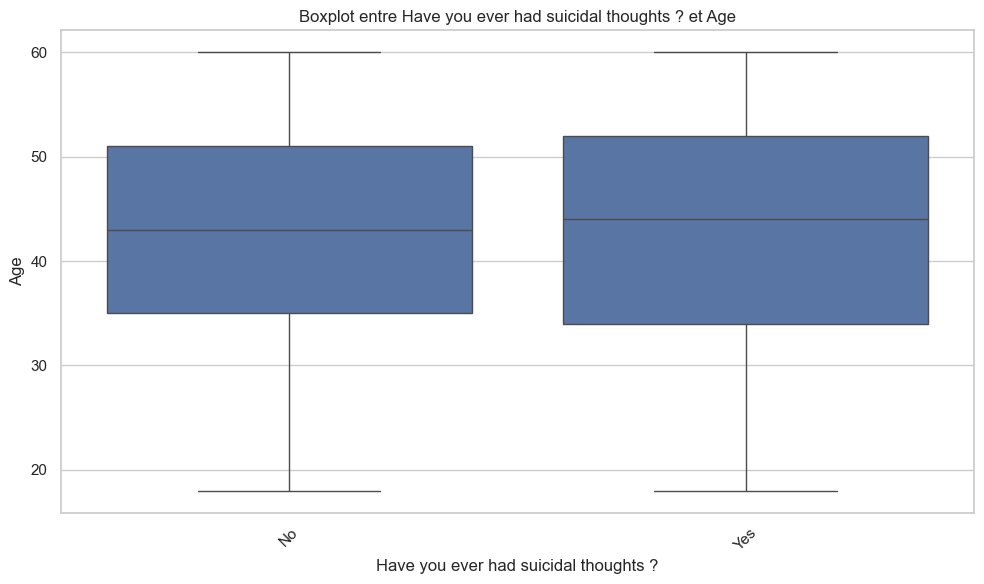

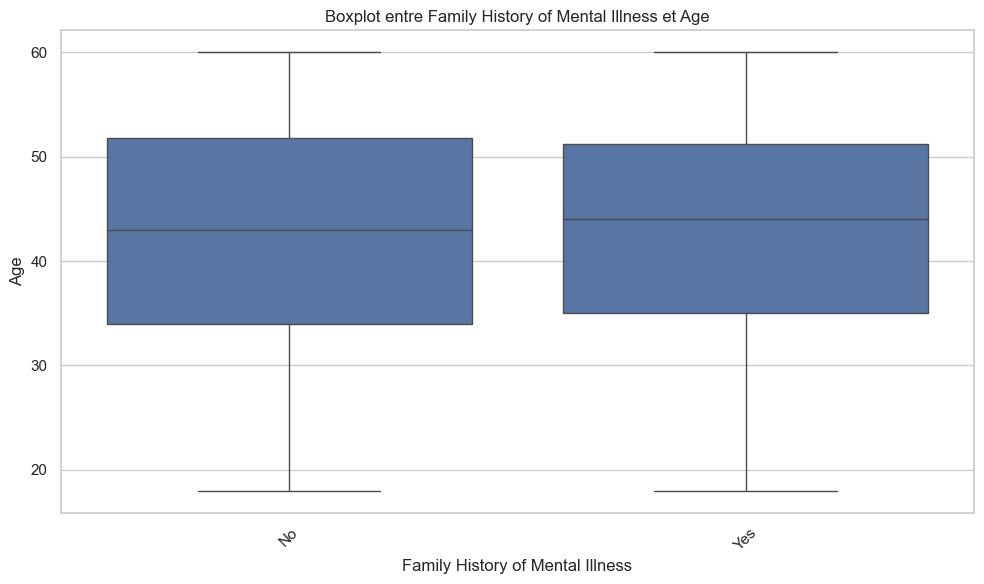

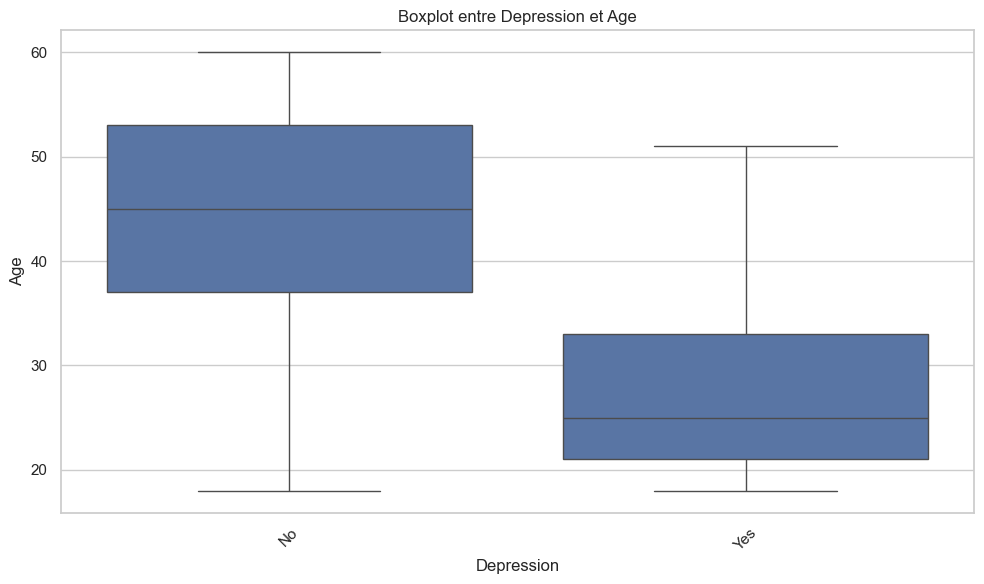

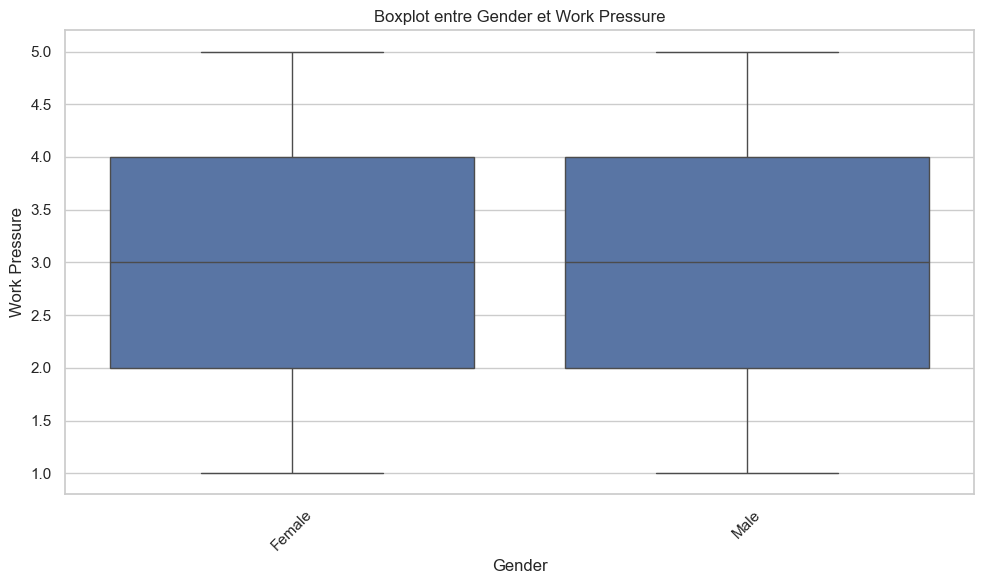

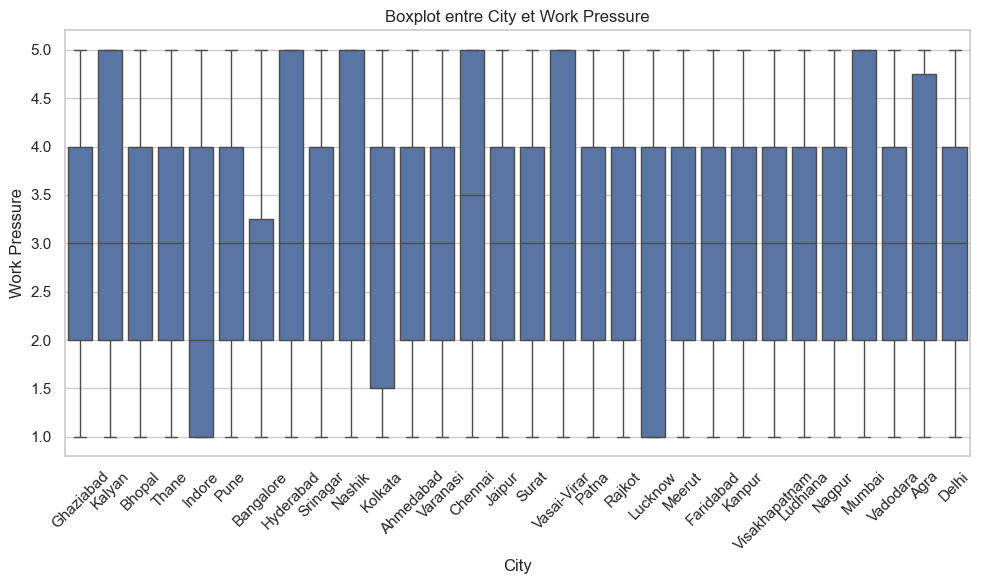

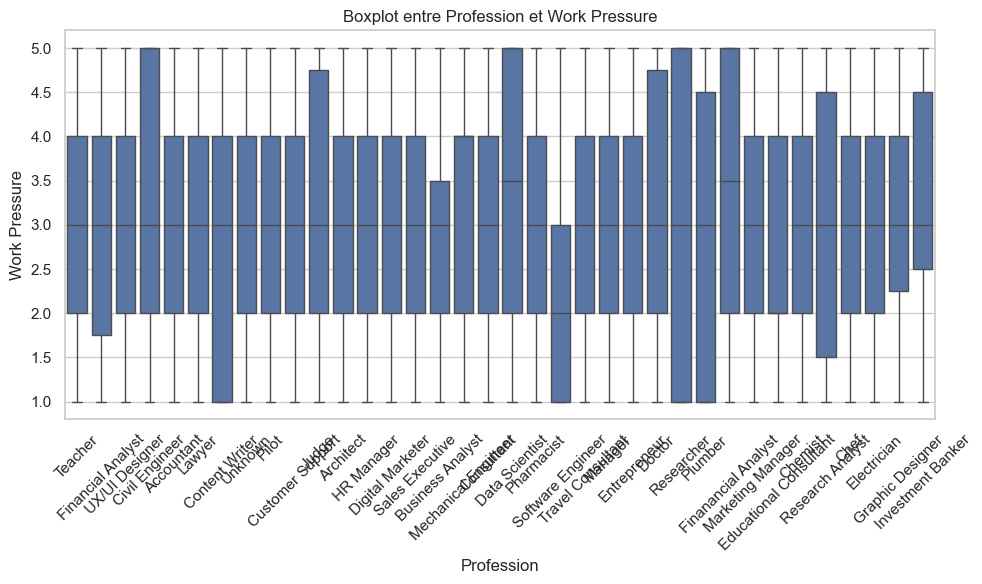

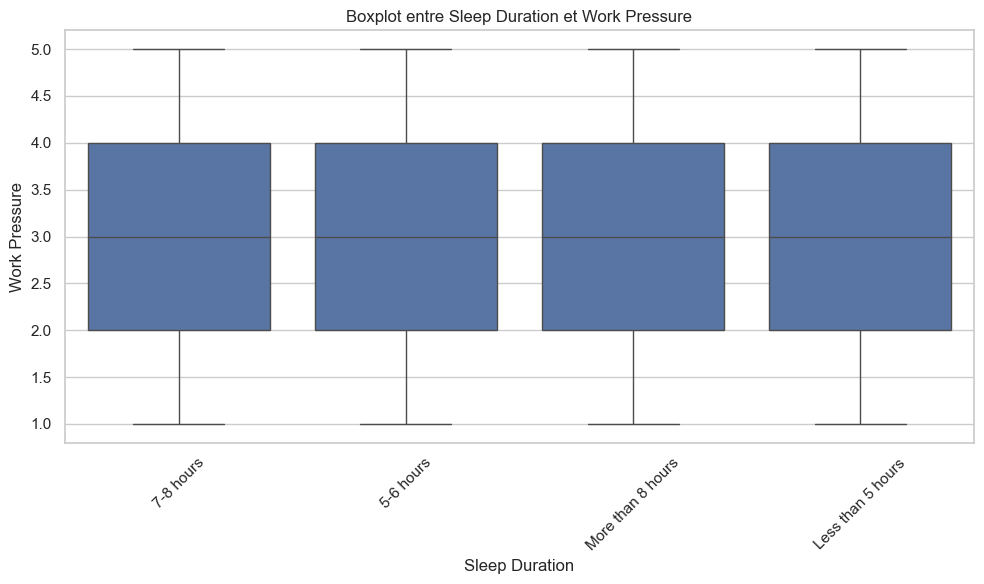

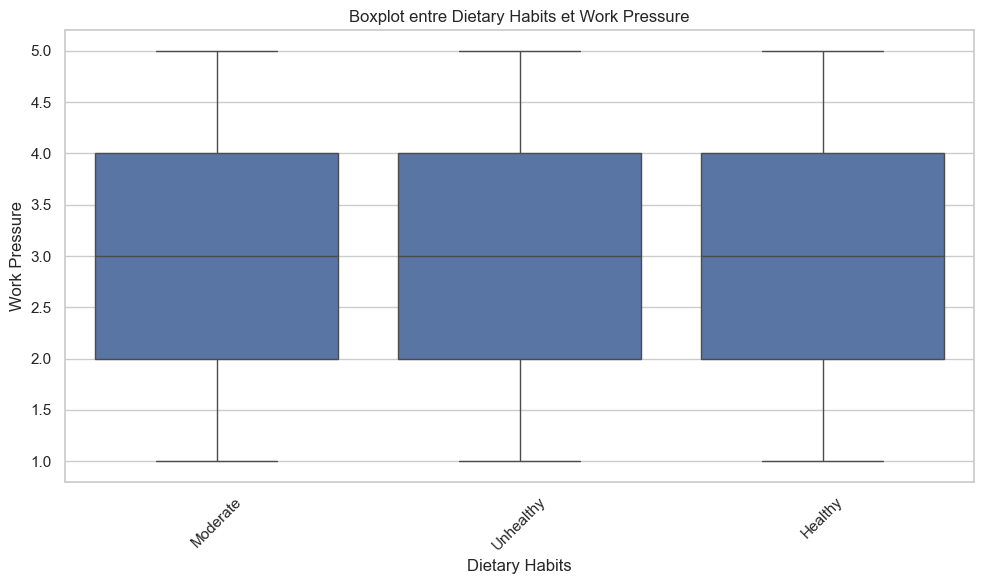

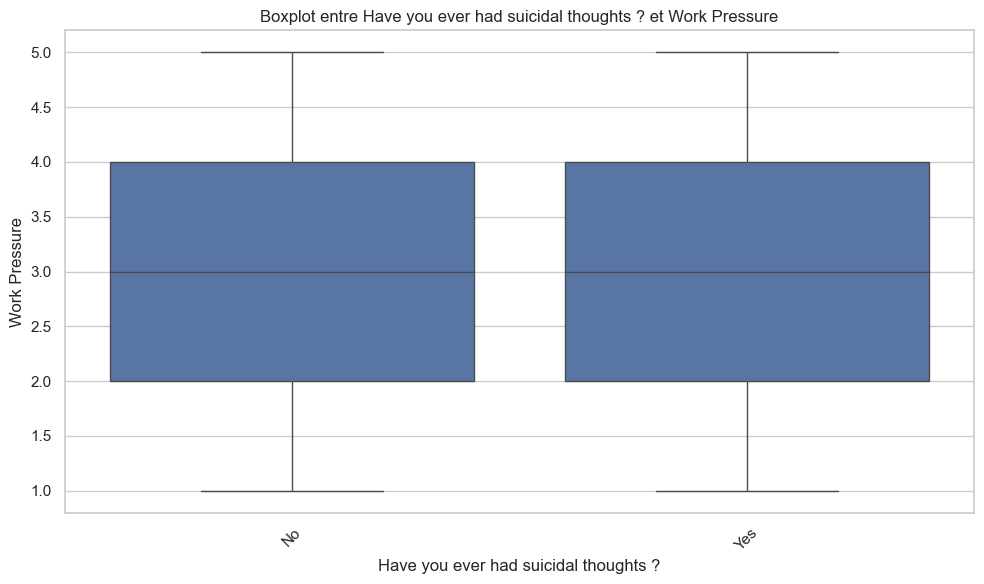

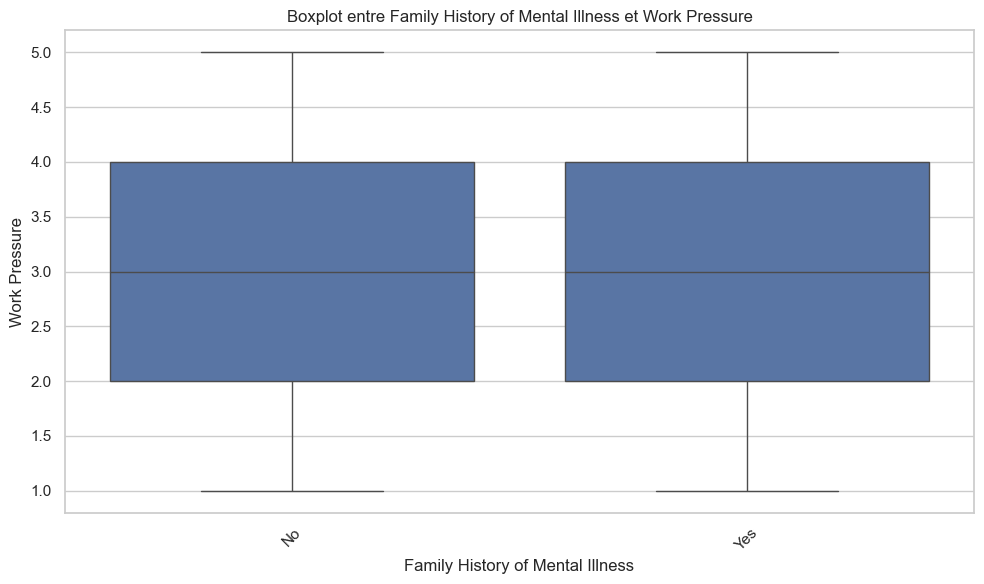

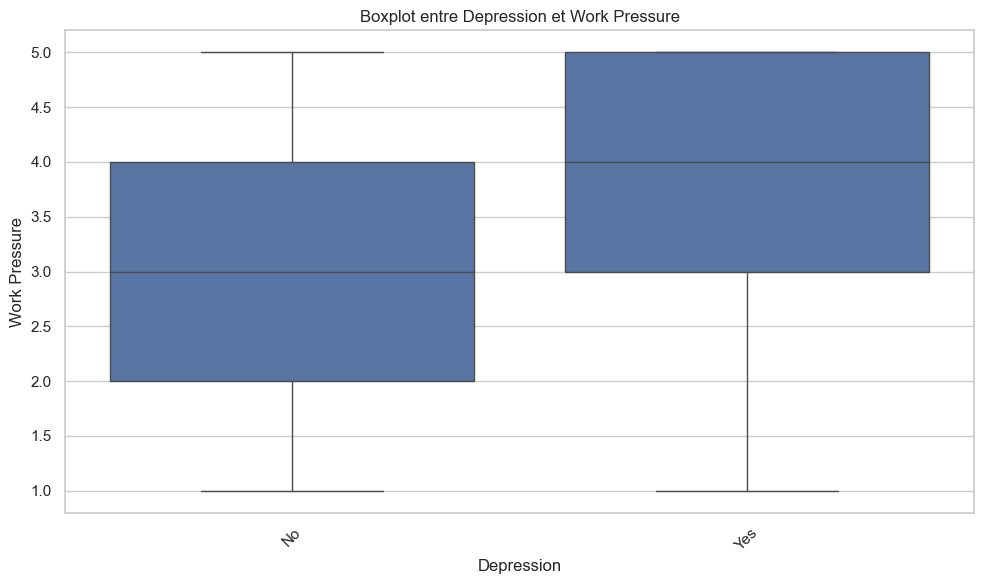

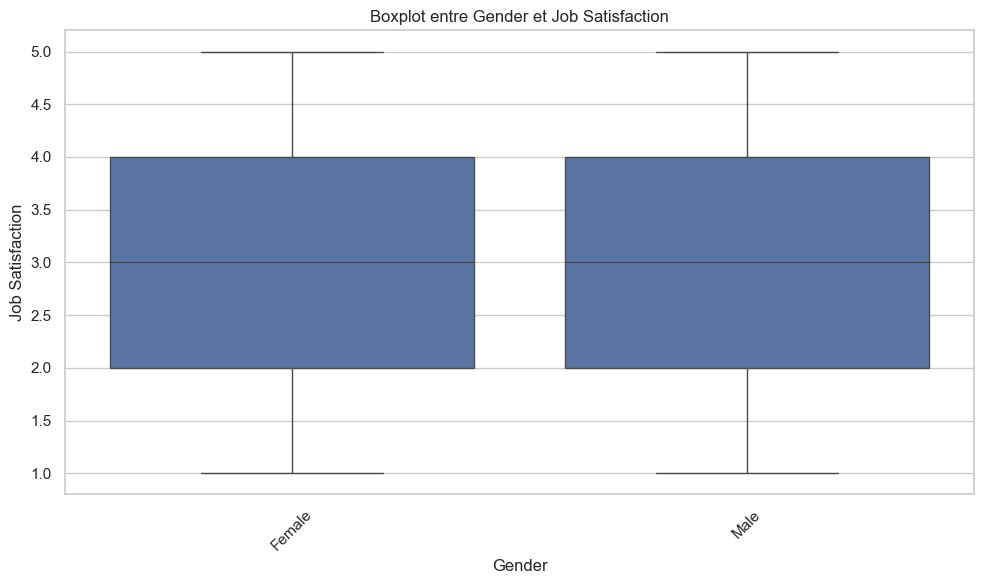

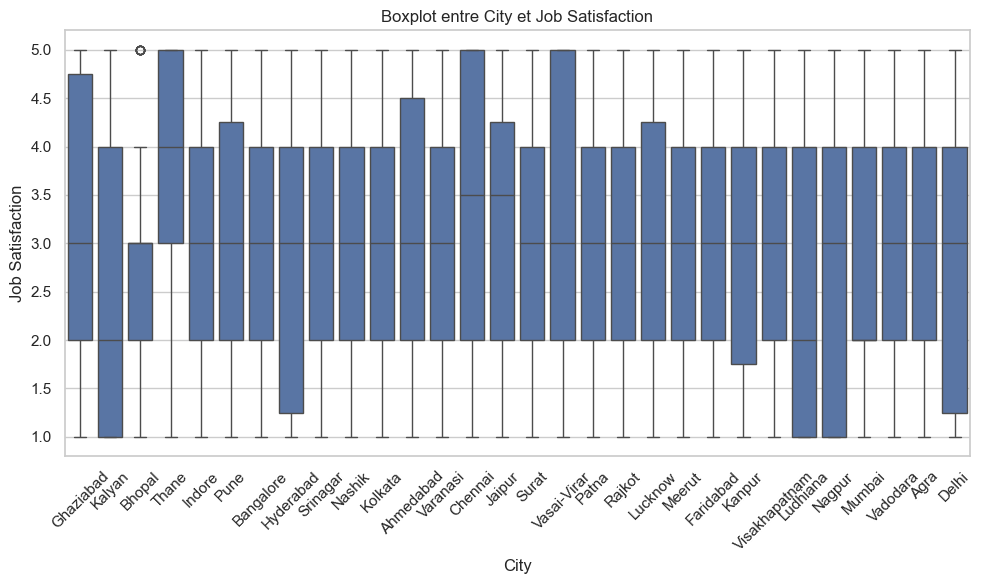

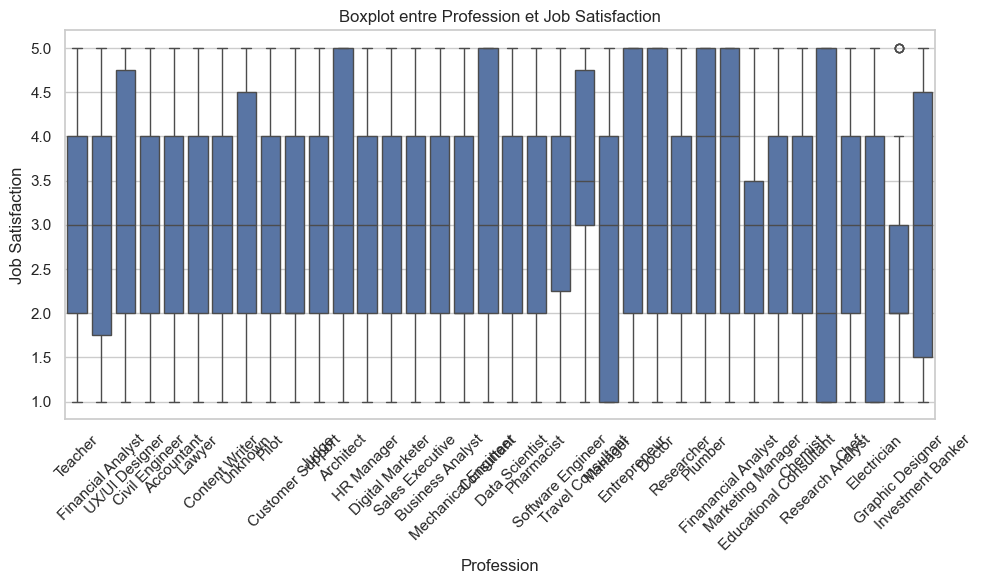

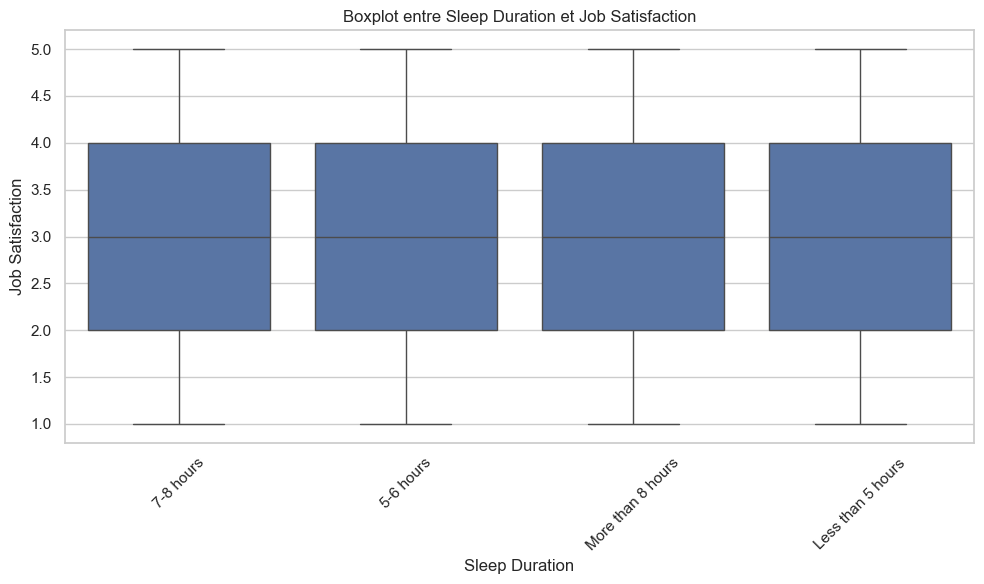

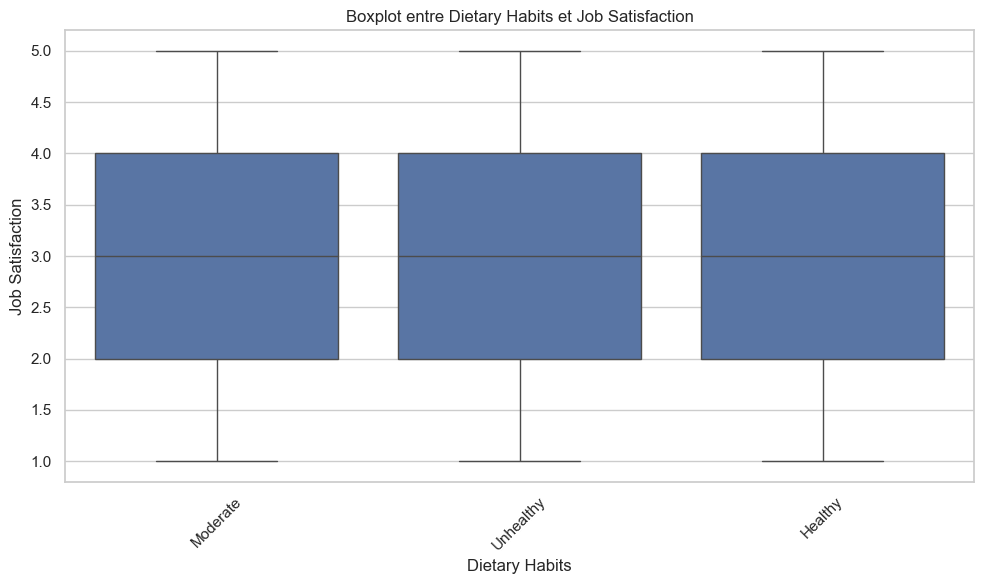

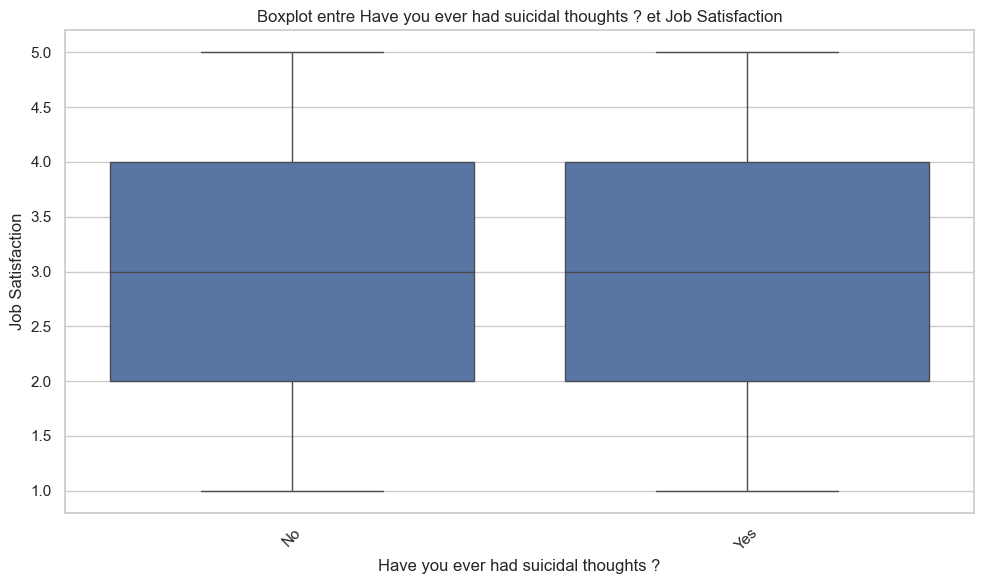

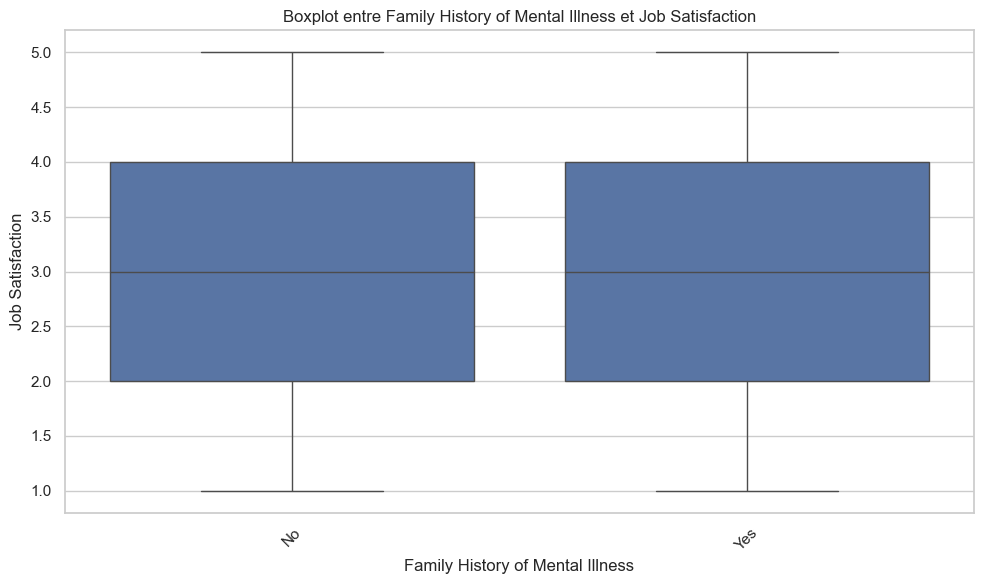

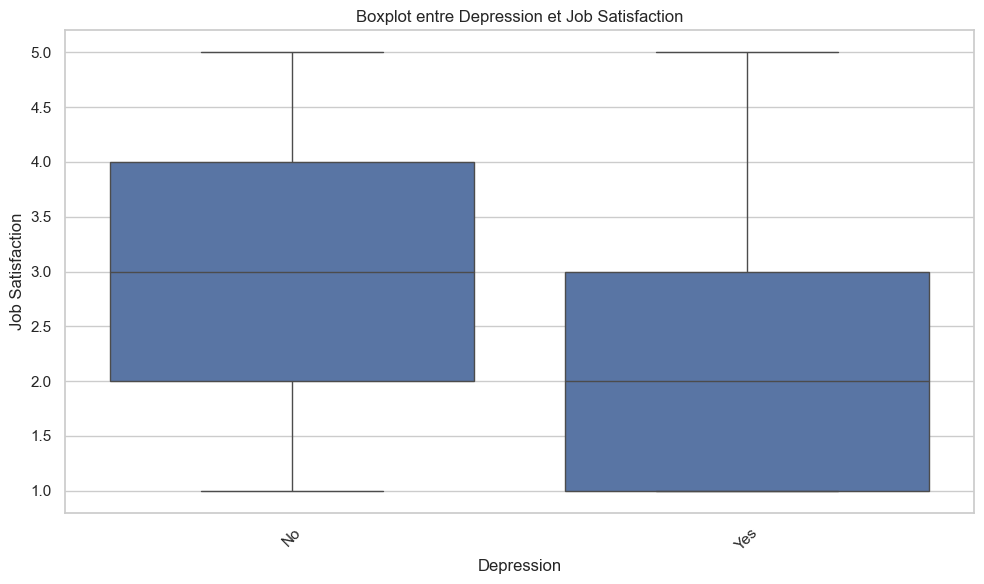

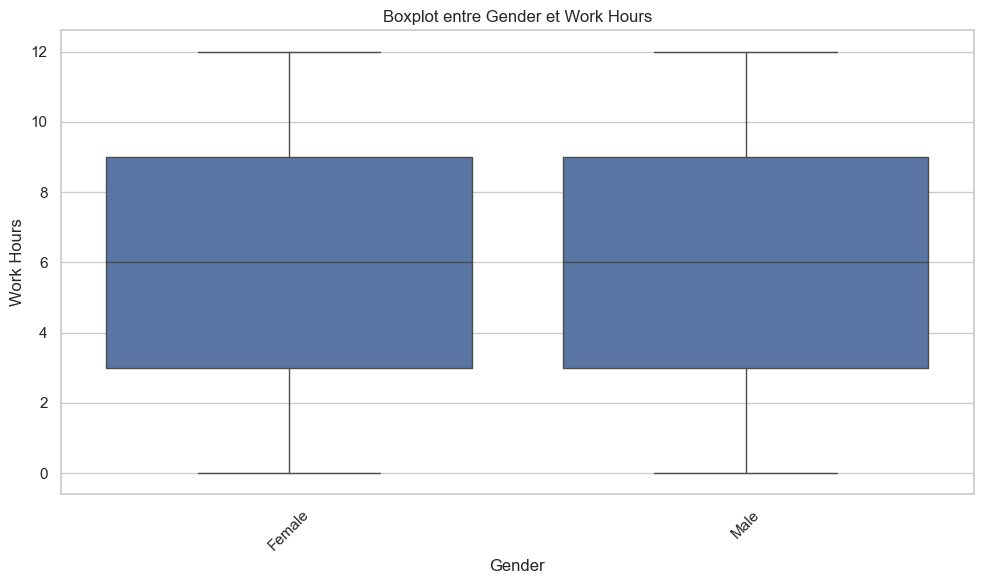

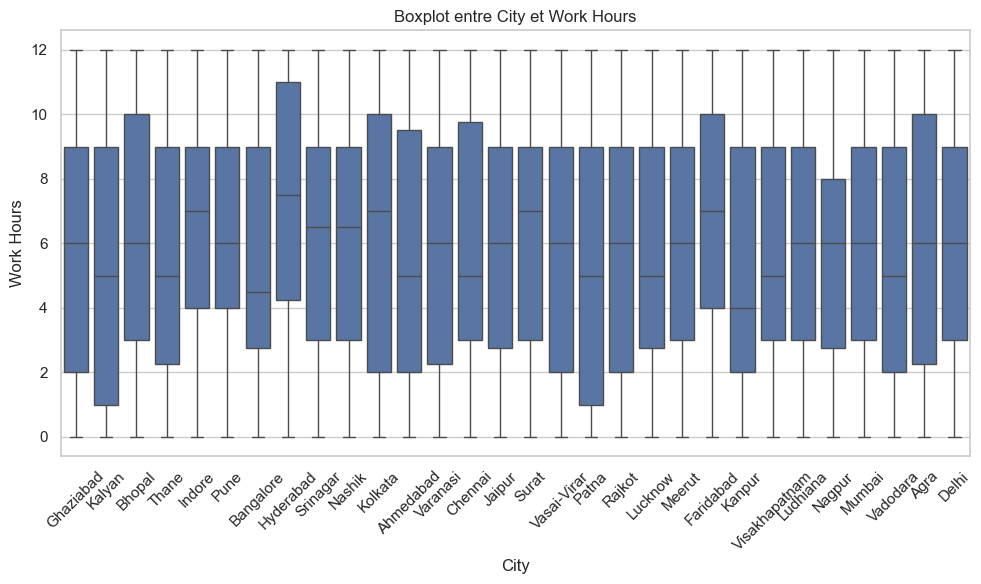

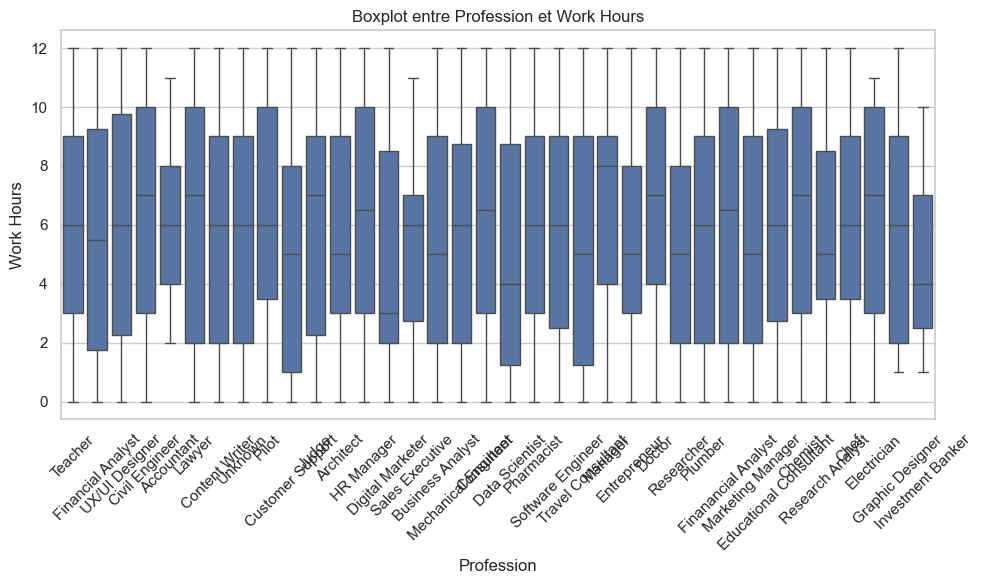

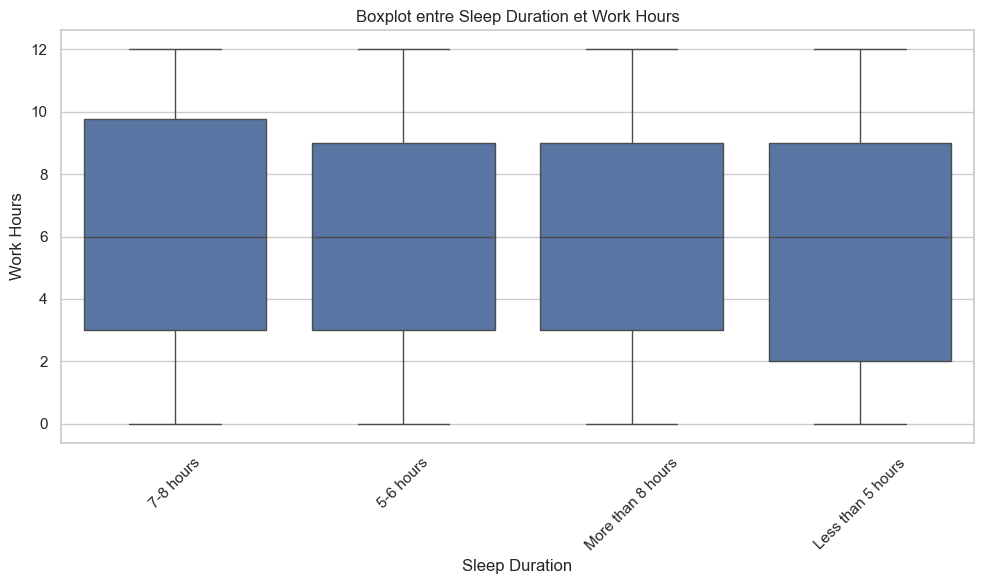

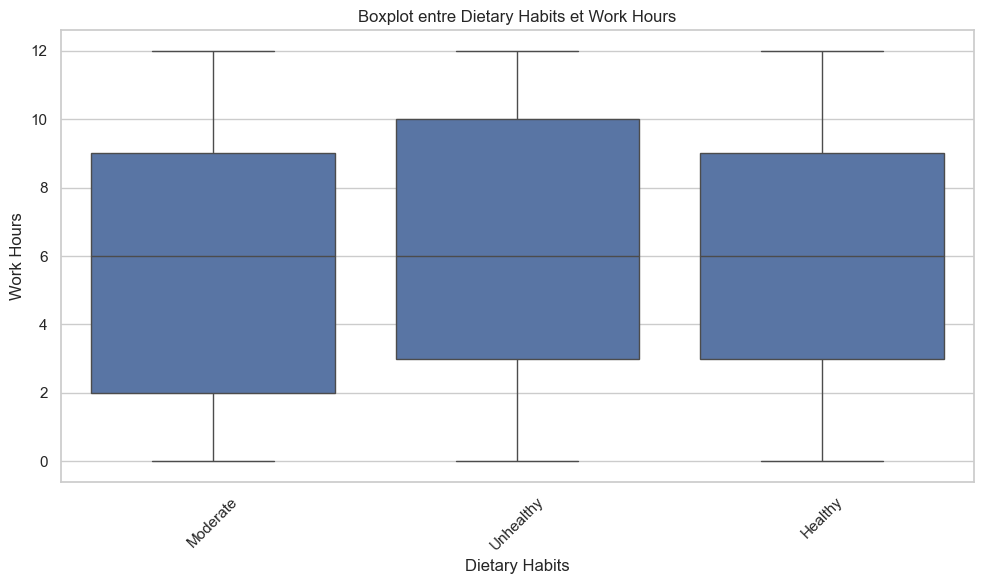

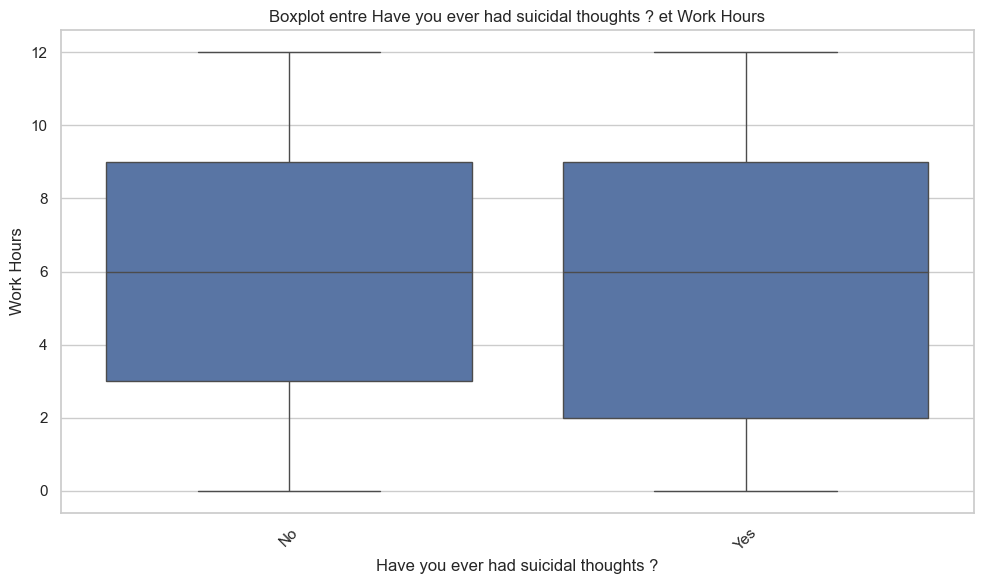

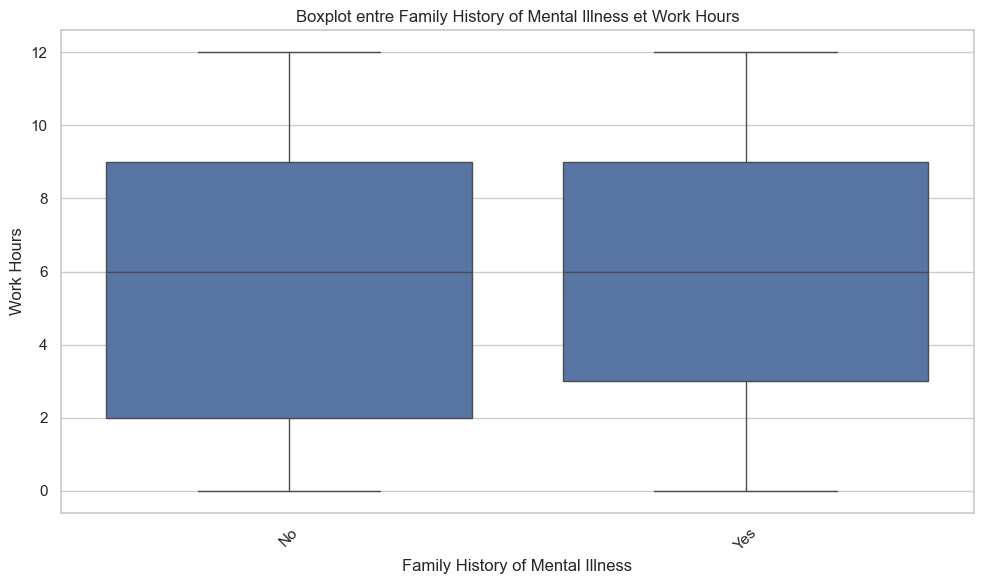

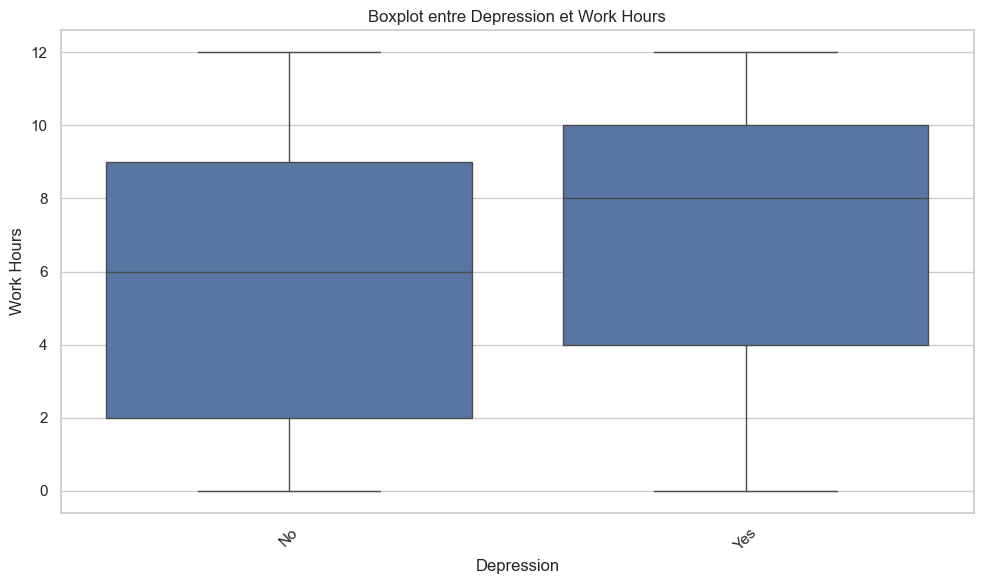

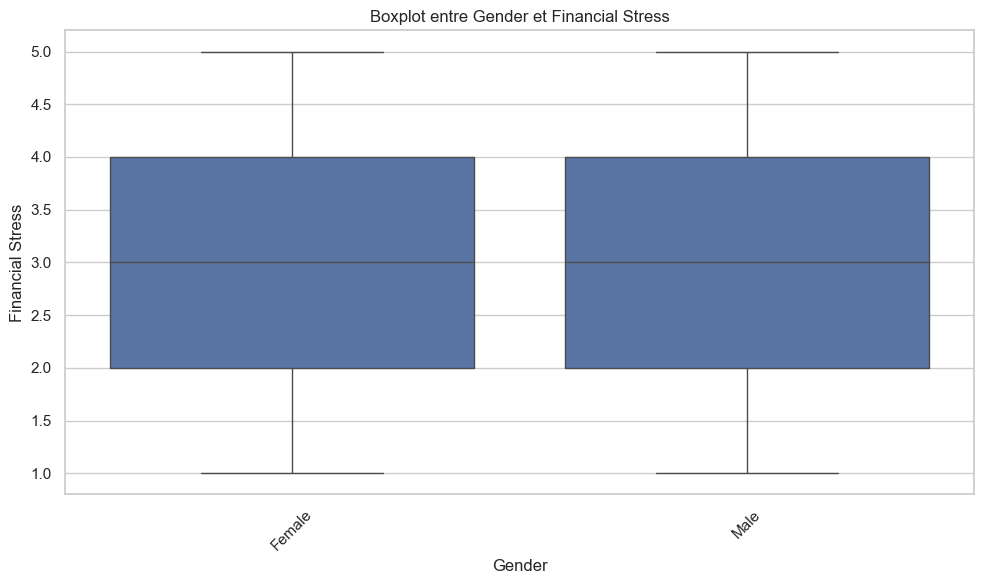

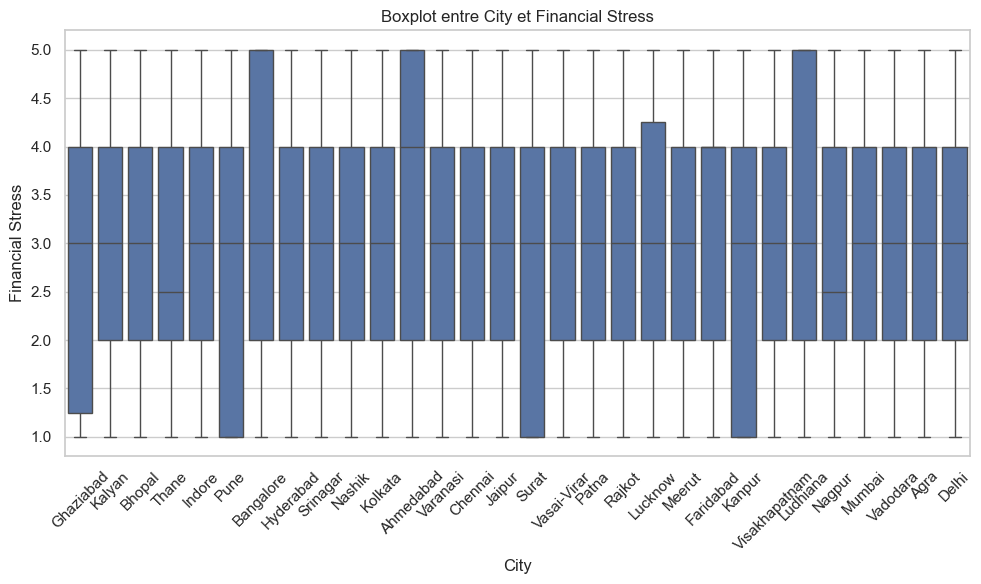

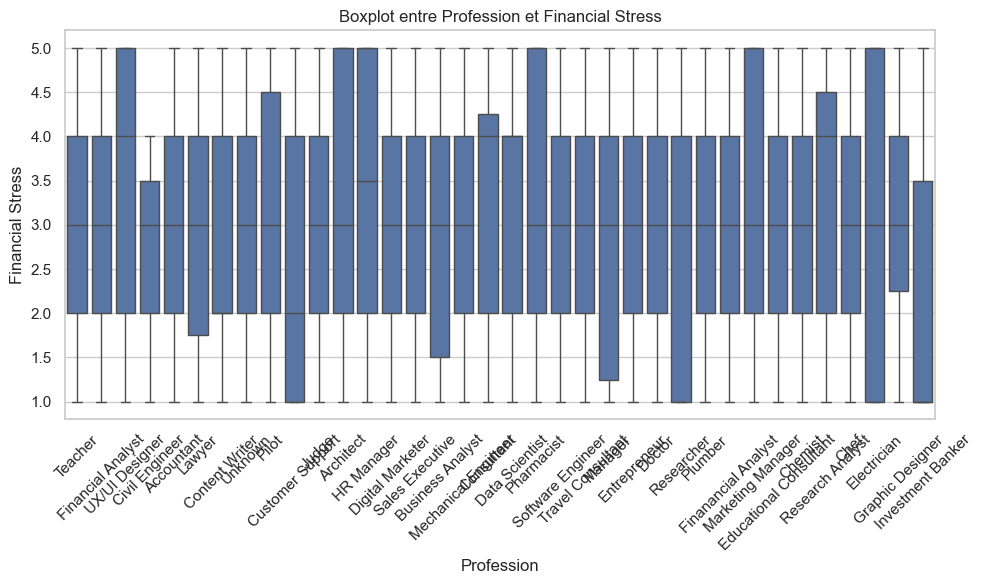

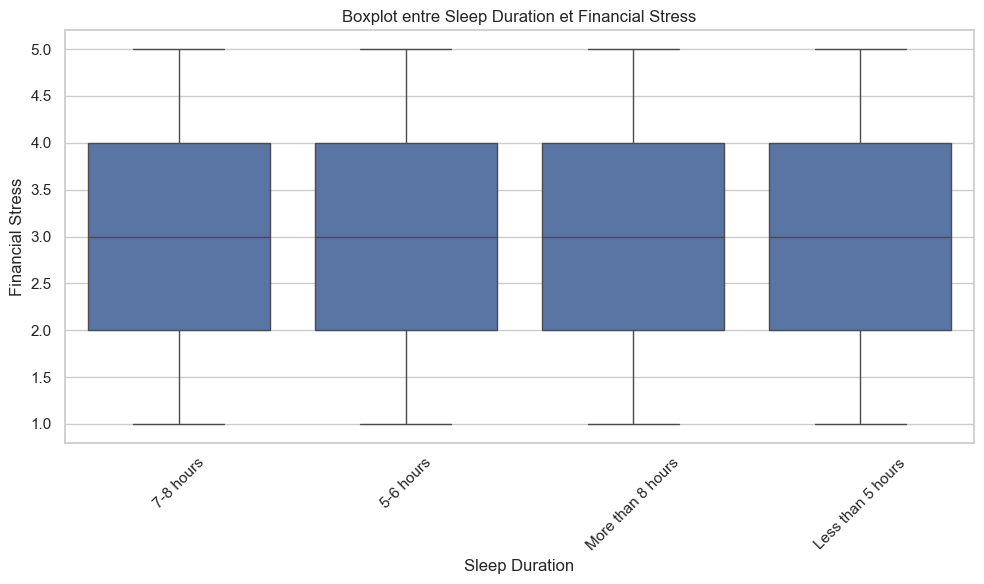

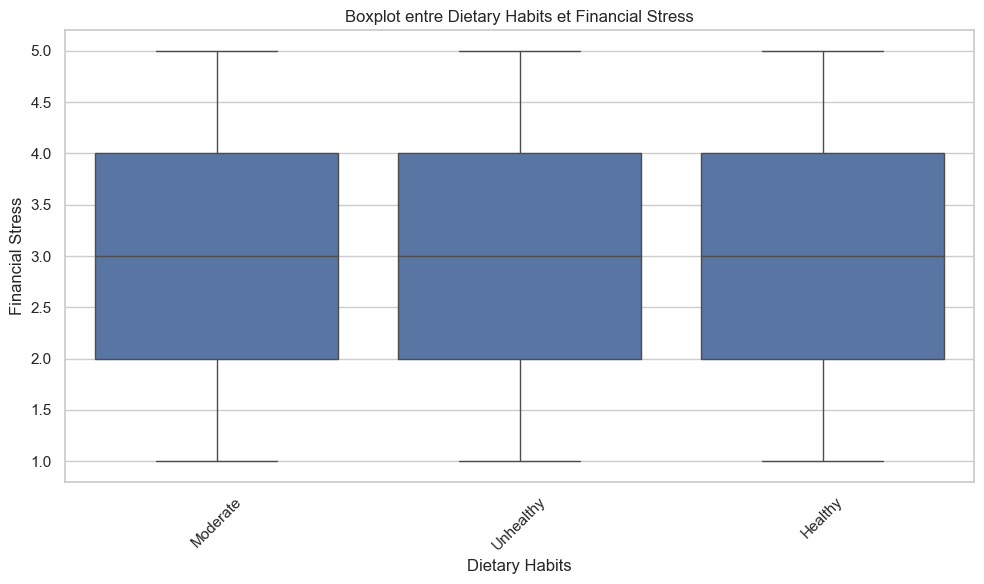

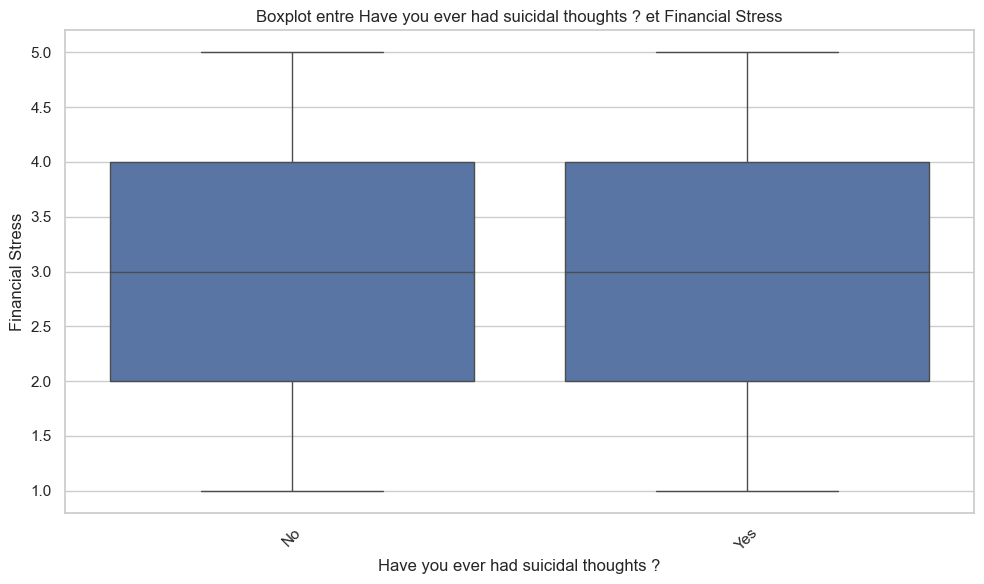

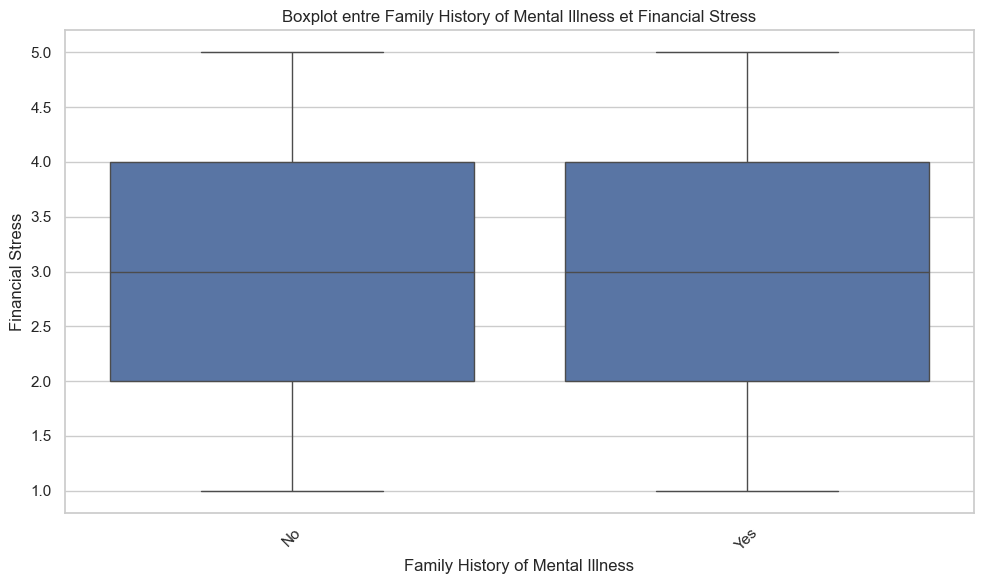

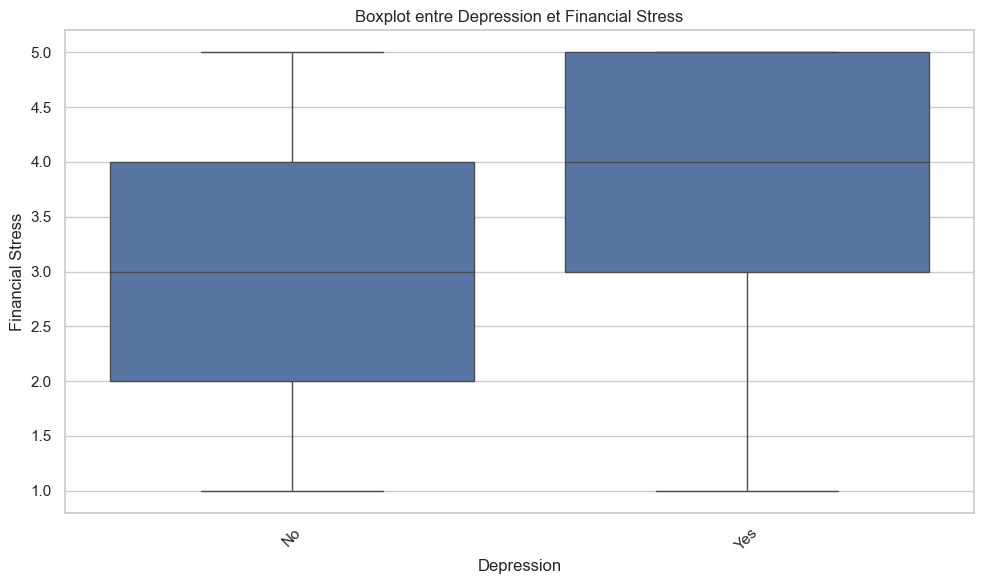

In [294]:
#Analyses variables qualitatives et quantitatives

# Liste des variables qualitatives et quantitatives
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns  # Sélectionner les variables qualitatives
quantitative_vars = df.select_dtypes(include=['float64', 'int64']).columns  # Sélectionner les variables quantitatives

# Créer des boxplots pour chaque combinaison (variable qualitative vs variable quantitative)
for quant_var in quantitative_vars:
    for qual_var in qualitative_vars:
        # Créer le boxplot
        plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure pour plus de clarté
        sns.boxplot(x=qual_var, y=quant_var, data=df)

        # Ajouter un titre et personnaliser l'affichage
        plt.title(f"Boxplot entre {qual_var} et {quant_var}")
        plt.xticks(rotation=45)  # Rotation des labels de l'axe x pour plus de lisibilité
        plt.tight_layout()  # Pour éviter que les labels soient coupés
        
        # Afficher le graphique
        plt.show()


In [295]:
from scipy.stats import kruskal

# Sélectionner les variables qualitatives et quantitatives
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns  # Variables qualitatives
quantitative_vars = df.select_dtypes(include=['float64', 'int64']).columns  # Variables quantitatives

# Boucle pour appliquer le test de Kruskal-Wallis pour chaque combinaison de variable quantitative et qualitative
for quant_var in quantitative_vars:
    for qual_var in qualitative_vars:
        # Séparer les données en fonction des différentes modalités de la variable qualitative
        grouped_data = [df[df[qual_var] == group][quant_var] for group in df[qual_var].unique()]

        # Appliquer le test de Kruskal-Wallis
        stat, p_value = kruskal(*grouped_data)

        # Afficher les résultats
        print(f"\nTest de Kruskal-Wallis entre {qual_var} et {quant_var} :")
        print(f"Statistique de test: {stat}")
        print(f"p-value: {p_value}")

        # Conclusion : Si p-value < 0.05, il y a des différences significatives entre les groupes
        if p_value < 0.05:
            print("Il y a une différence significative entre les groupes.")
        else:
            print("Il n'y a pas de différence significative entre les groupes.")



Test de Kruskal-Wallis entre Gender et Age :
Statistique de test: 9.019564651889543e-05
p-value: 0.9924224934419636
Il n'y a pas de différence significative entre les groupes.

Test de Kruskal-Wallis entre City et Age :
Statistique de test: 21.65014071143445
p-value: 0.8343834892674343
Il n'y a pas de différence significative entre les groupes.

Test de Kruskal-Wallis entre Profession et Age :
Statistique de test: 156.9364359683764
p-value: 2.250173928202934e-17
Il y a une différence significative entre les groupes.

Test de Kruskal-Wallis entre Sleep Duration et Age :
Statistique de test: 8.395152769300333
p-value: 0.03851345261322248
Il y a une différence significative entre les groupes.

Test de Kruskal-Wallis entre Dietary Habits et Age :
Statistique de test: 3.5986647828078775
p-value: 0.16540928002544109
Il n'y a pas de différence significative entre les groupes.

Test de Kruskal-Wallis entre Have you ever had suicidal thoughts ? et Age :
Statistique de test: 1.8037364652859114


ANALYSES MULTIVARIEES (réduction des dimensions tout en obtenant le maximum d'information)

In [296]:
#ACP

ENCODAGE DES VARIABLES CATEGORIELLES POUR ENTRAINER LE MODELE

In [297]:
# Dictionnaire de remplacement pour regrouper les professions
replace_dict = {
    'Teacher': 'Education & Enseignement',
    'Educational Consultant': 'entrepreneur/consultant',
    'UX/UI Designer': 'Créativité & Communication',
    'Graphic Designer': 'Créativité & Communication',
    'Content Writer': 'Créativité & Communication',
    'Digital Marketer': 'Créativité & Communication',
    'Chef': 'Droit/Autorité',
    'Lawyer': 'Droit/Autorité',
    'Judge': 'Droit/Autorité',
    'Researcher': 'Sciences & Recherche',
    'Research Analyst': 'Sciences & Recherche',
    'Chemist': 'Sciences & Recherche',
    'Pharmacist': 'Sciences & Recherche',
    'Doctor': 'Sciences & Recherche',
    'Software Engineer': 'Ingénierie & Informatique',
    'Data Scientist': 'Ingénierie & Informatique',
    'Mechanical Engineer': 'Ingénierie & Informatique',
    'Civil Engineer': 'Ingénierie & Informatique',
    'Business Analyst': 'Ingénierie & Informatique',
    'Manager': 'Management & conseil',
    'Marketing Manager': 'Management & conseil',
    'Financial Analyst': 'Management & conseil',
    'Finanancial Analyst': 'Management & conseil',
    'Investment Banker': 'Management & conseil',
    'Accountant': 'Management & conseil',
    'Architect': 'Management & conseil',
    'Customer Support': 'Management & conseil',
    'HR Manager': 'Management & conseil',
    'Plumber': 'Management & conseil',
    'Electrician': 'Management & conseil',
    'Pilot': 'Management & conseil',
    'Sales Executive': 'Management & conseil',
    'Entrepreneur': 'entrepreneur/consultant',
    'Consultant': 'entrepreneur/consultant',
    'Travel Consultant': 'entrepreneur/consultant'
}

# Appliquer le remplacement dans la colonne 'Profession'
df['Profession'] = df['Profession'].replace(replace_dict)

# Vérifier les valeurs uniques après remplacement
print(df['Profession'].unique())

['Education & Enseignement' 'Management & conseil'
 'Créativité & Communication' 'Ingénierie & Informatique' 'Droit/Autorité'
 'Unknown' 'entrepreneur/consultant' 'Sciences & Recherche']


In [298]:
#COMMENT FAIRE LE MICE POUR LES COLONNES MNAR    
# Appliquer le One-Hot Encoding sur la colonne 'Profession'
   # df_encoded = pd.get_dummies(df, columns=['Profession'], drop_first=True)

    # Convertir uniquement les colonnes de type booléen en 1 et 0
    #bool_columns = df_encoded.select_dtypes(include='bool').columns
    #df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

    # Vérifier les résultats de l'encodage
    #print(df_encoded.info)
#from sklearn.experimental import enable_iterative_imputer  # nécessaire pour activer IterativeImputer
#from sklearn.impute import IterativeImputer

# Charger ton DataFrame (df)

# Sélectionner les colonnes à imputer
#columns_to_impute = ['Job Satisfaction', 'Job Pressure', 'Profession']

# Créer un itérateur d'imputation itérative
#imputer = IterativeImputer(max_iter=10, random_state=0)

# Appliquer l'imputation uniquement sur les colonnes sélectionnées
#df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Vérifier le résultat
#print(df[columns_to_impute].head())

In [299]:

# Dictionnaire de remplacement des villes par leurs catégories
replace_dict2 = {
    'Ghaziabad': 'Villes du Nord', 'Kalyan': 'Villes intermédiaires', 'Bhopal': 'Villes du Centre et Est', 
    'Thane': 'Villes intermédiaires', 'Indore': 'Villes du Centre et Est', 'Pune': 'Villes de l\'Ouest', 
    'Bangalore': 'Villes du Sud', 'Hyderabad': 'Villes du Sud', 'Srinagar': 'Villes du Nord', 
    'Nashik': 'Villes intermédiaires', 'Kolkata': 'Villes du Centre et Est', 'Ahmedabad': 'Villes de l\'Ouest', 
    'Varanasi': 'Villes du Centre et Est', 'Chennai': 'Villes du Sud', 'Jaipur': 'Villes intermédiaires', 
    'Surat': 'Villes de l\'Ouest', 'Vasai-Virar': 'Villes intermédiaires', 'Patna': 'Villes du Centre et Est', 
    'Rajkot': 'Villes de l\'Ouest', 'Lucknow': 'Villes du Nord', 'Meerut': 'Villes du Nord', 
    'Faridabad': 'Villes intermédiaires', 'Kanpur': 'Villes du Nord', 'Visakhapatnam': 'Villes du Sud', 
    'Ludhiana': 'Villes intermédiaires', 'Nagpur': 'Villes du Centre et Est', 'Mumbai': 'Villes de l\'Ouest', 
    'Vadodara': 'Villes de l\'Ouest', 'Agra': 'Villes intermédiaires', 'Delhi': 'Villes du Nord'
}

# Remplacer les valeurs dans la colonne 'City'
df['City'] = df['City'].replace(replace_dict2)

# Vérifier les valeurs uniques après remplacement
print(df['City'].unique())


['Villes du Nord' 'Villes intermédiaires' 'Villes du Centre et Est'
 "Villes de l'Ouest" 'Villes du Sud']


In [300]:
# Appliquer le One-Hot Encoding sur ces colonnes
qualitative_columns = ['City', 'Profession', 'Dietary Habits', 'Gender', 'Sleep Duration']
df_encoded = pd.get_dummies(df, columns=qualitative_columns, drop_first=True)

# Afficher le DataFrame après encodage
print(df_encoded)

      Age  Work Pressure  Job Satisfaction  \
0      37            2.0               4.0   
1      60            4.0               3.0   
2      42            2.0               3.0   
3      44            3.0               5.0   
4      48            4.0               3.0   
...   ...            ...               ...   
2550   45            1.0               3.0   
2551   25            1.0               5.0   
2552   23            3.0               1.0   
2553   24            1.0               4.0   
2554   56            2.0               3.0   

     Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                       No           6                 2   
1                                      Yes           0                 4   
2                                       No           0                 2   
3                                      Yes           1                 2   
4                                      Yes           6             

In [301]:
df_encoded['Depression'] = df_encoded['Depression'].map({'Yes': 1, 'No': 0}).astype(int)
df_encoded['Have you ever had suicidal thoughts ?'] = df_encoded['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0}).astype(int)
df_encoded['Family History of Mental Illness'] = df_encoded['Family History of Mental Illness'].map({'Yes': 1, 'No': 0}).astype(int)

# Afficher le DataFrame après encodage
print(df_encoded)

      Age  Work Pressure  Job Satisfaction  \
0      37            2.0               4.0   
1      60            4.0               3.0   
2      42            2.0               3.0   
3      44            3.0               5.0   
4      48            4.0               3.0   
...   ...            ...               ...   
2550   45            1.0               3.0   
2551   25            1.0               5.0   
2552   23            3.0               1.0   
2553   24            1.0               4.0   
2554   56            2.0               3.0   

      Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                         0           6                 2   
1                                         1           0                 4   
2                                         0           0                 2   
3                                         1           1                 2   
4                                         1           6       

In [302]:
# Enregistrement de la base de données en CSV
df_encoded.to_csv('donnees_Nettoyees.csv', index=False)


In [303]:
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la target (y)
X = df_encoded.drop(['Depression', 'Profession_Droit/Autorité', 'City_Villes du Nord', 'Profession_Ingénierie & Informatique',  'City_Villes du Sud', 'Gender_Male', 'City_Villes intermédiaires', 'Profession_Management & conseil', 'City_Villes du Centre et Est', 'Profession_Education & Enseignement',  'Sleep Duration_7-8 hours', 'Dietary Habits_Moderate'], axis=1)  # Remplace 'target' par le nom de ta colonne cible
y = df_encoded['Depression']  # La colonne cible

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [304]:
from sklearn.linear_model import LogisticRegression

# Création du modèle
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_prediction = model.predict(X_test)

# Évaluation du modèle
from sklearn.metrics import accuracy_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_prediction)
print(f"Recall: {recall:.4f}")


f1 = f1_score(y_test, y_prediction)  # Calcul du F1-score
print(f"F1-score: {f1:.4f}")





Accuracy: 0.9854
Recall: 0.8710
F1-score: 0.9231


In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Création du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-score: {f1_rf:.4f}")


Random Forest - Accuracy: 0.9579
Random Forest - Recall: 0.5806
Random Forest - F1-score: 0.7347


Depression                               1.000000
Have you ever had suicidal thoughts ?    0.239176
Profession_Unknown                       0.236793
Work Pressure                            0.197509
Financial Stress                         0.151644
Work Hours                               0.128430
Dietary Habits_Unhealthy                 0.094351
Sleep Duration_Less than 5 hours         0.093923
Family History of Mental Illness         0.017549
Profession_Droit/Autorité                0.008013
City_Villes du Nord                      0.006458
Profession_Ingénierie & Informatique    -0.003012
City_Villes du Sud                      -0.003416
Gender_Male                             -0.007687
City_Villes intermédiaires              -0.009705
Name: Depression, dtype: float64
Profession_Management & conseil       -0.012727
City_Villes du Centre et Est          -0.014760
Profession_Education & Enseignement   -0.017157
Sleep Duration_7-8 hours              -0.020061
Dietary Habits_Moderate  

C:\Users\franc\AppData\Local\Temp\ipykernel_24584\487060335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.head(15).index, y=target_corr.head(15).values, palette="coolwarm")


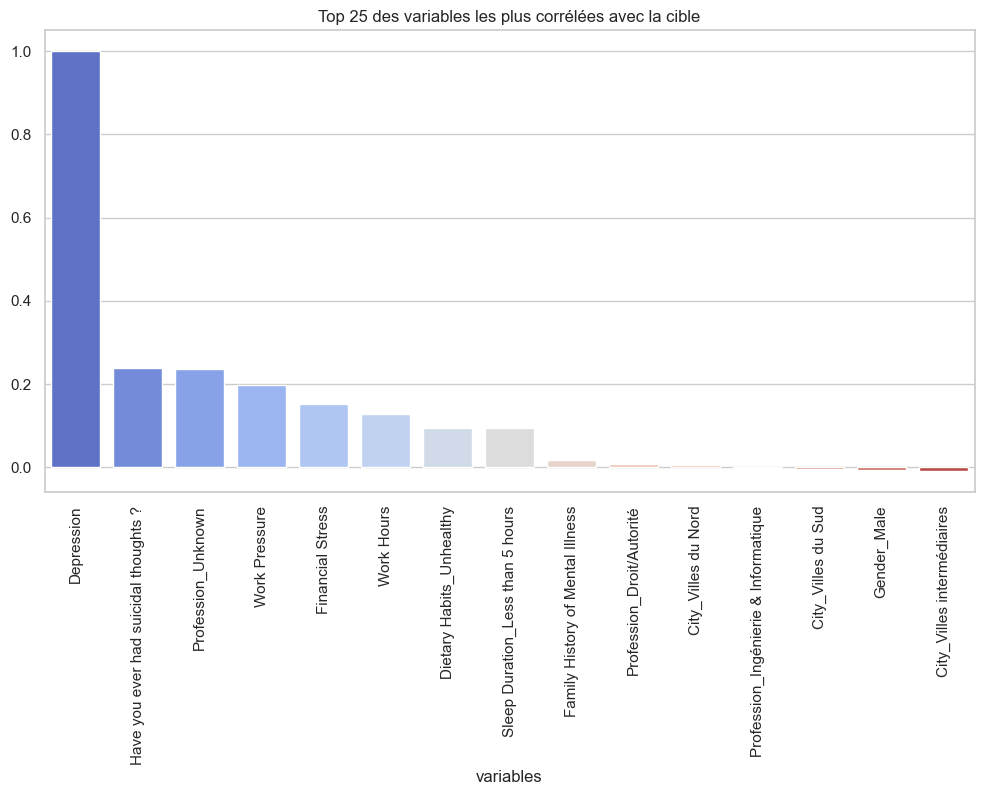

In [306]:
#LES VARIABLES LES PLUS IMPORTANTES DU DATAFRAME
# Calcul de la corrélation entre toutes les variables et la cible `y`
target_corr = df_encoded.corr()["Depression"].sort_values(ascending=False)

# Afficher les 10 variables les plus corrélées avec `y`
print(target_corr.head(15))  # Corrélation positive
print(target_corr.tail(10))  # Corrélation négative

# Visualisation des corrélations les plus importantes
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.head(15).index, y=target_corr.head(15).values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 25 des variables les plus corrélées avec la cible")
plt.xlabel("variables")
plt.show()

